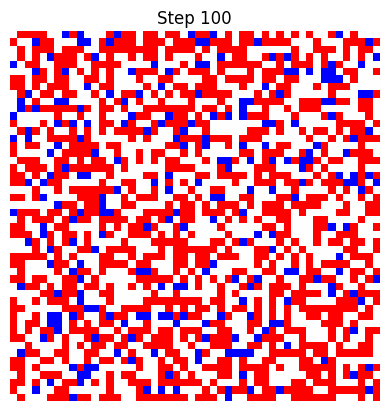

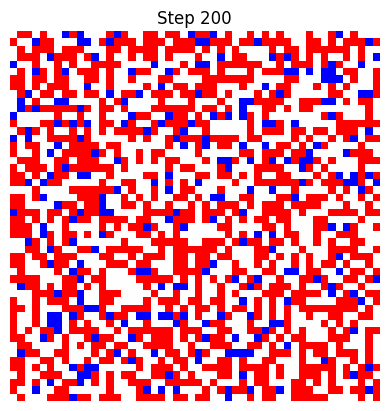

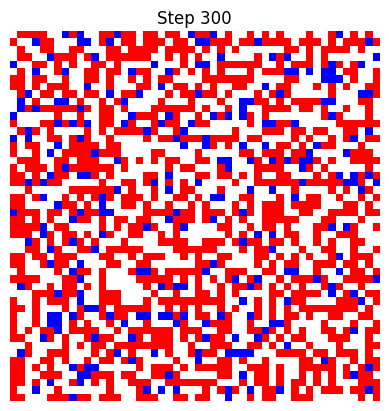

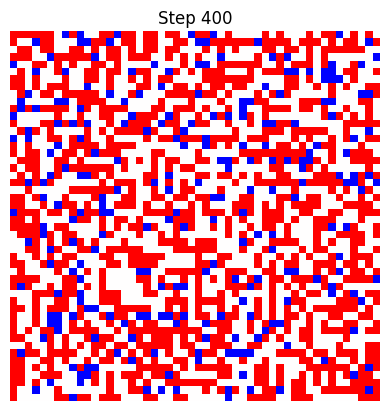

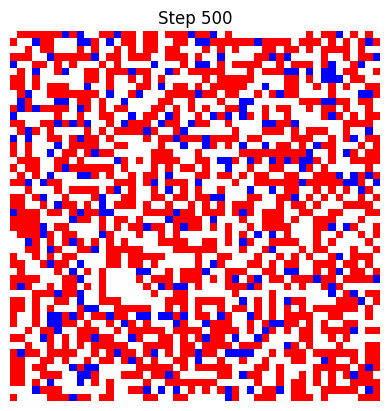

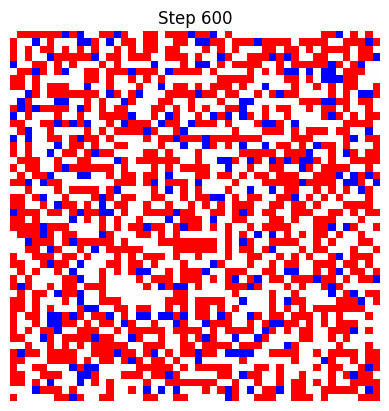

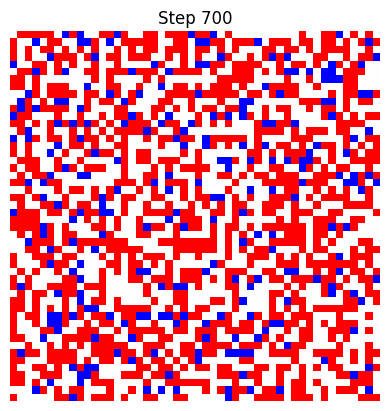

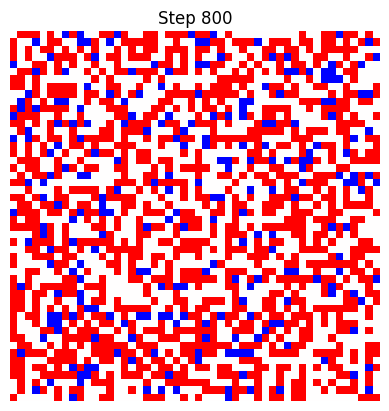

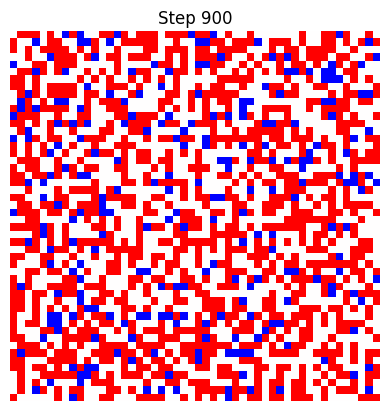

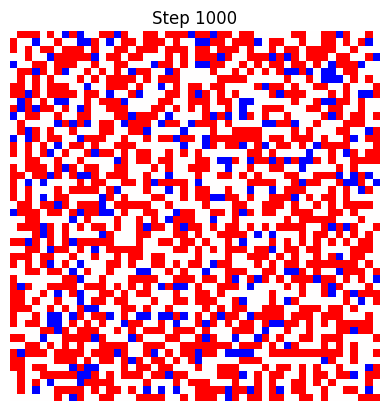

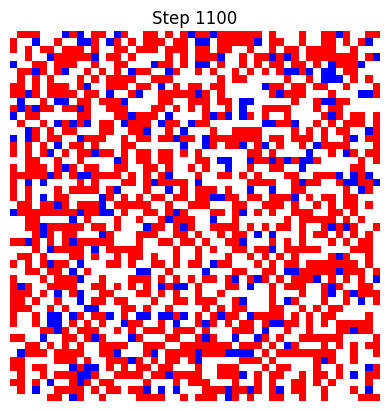

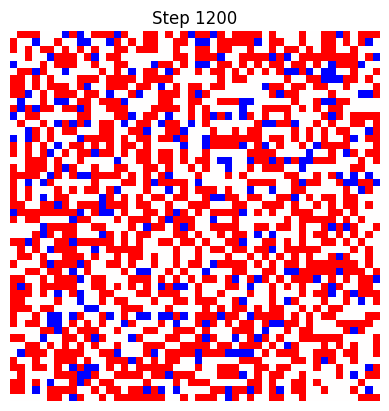

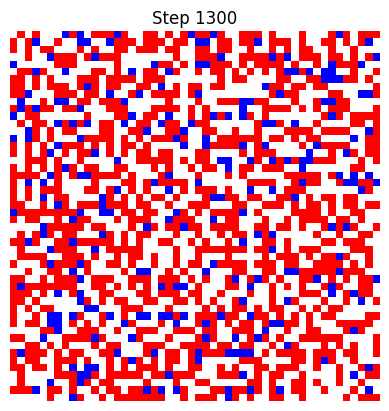

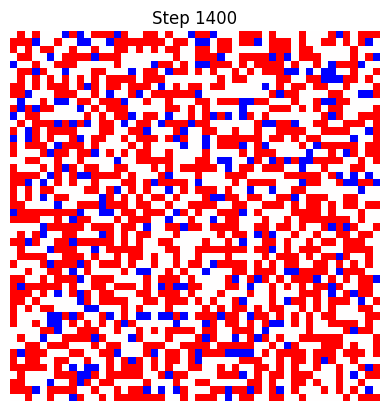

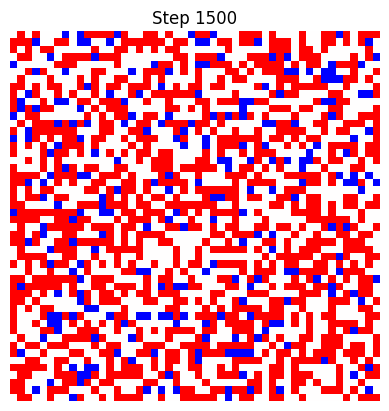

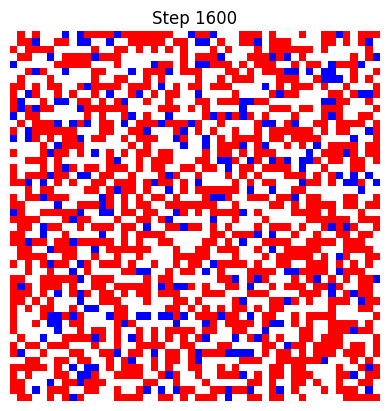

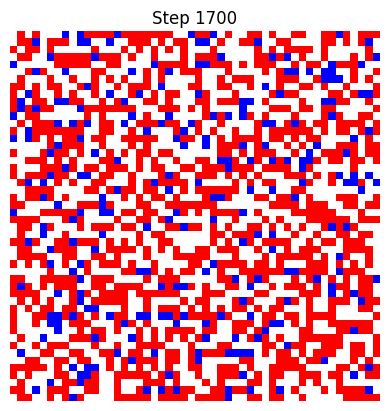

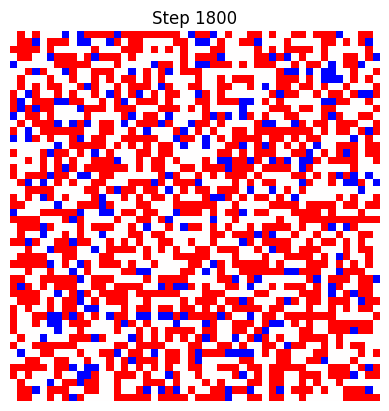

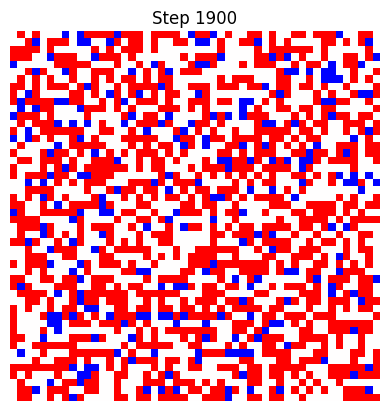

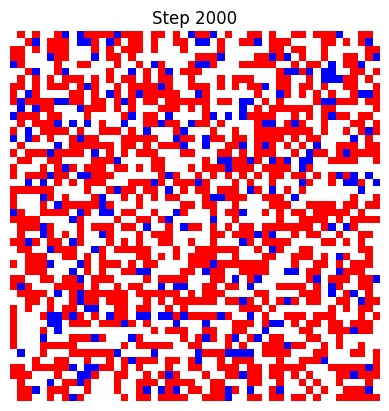

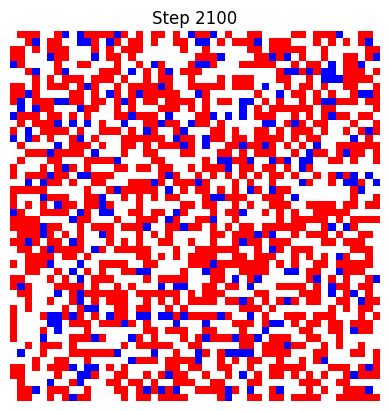

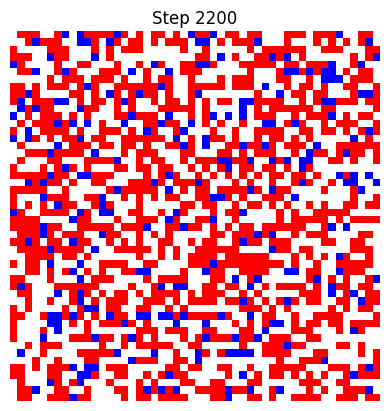

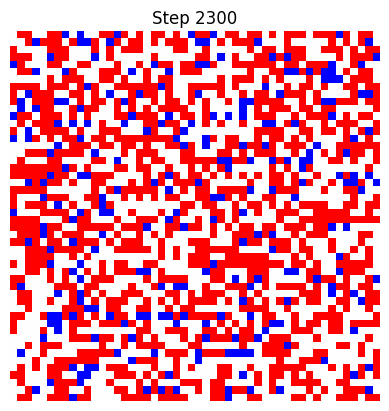

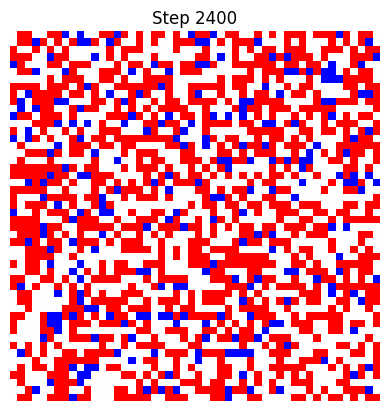

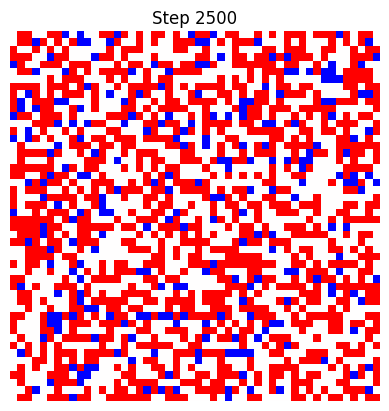

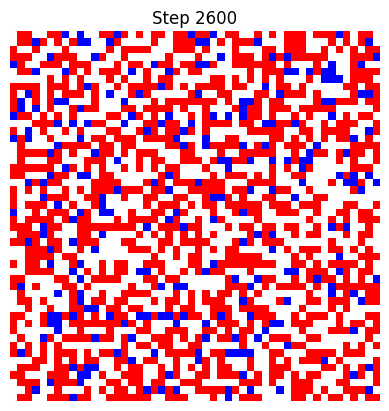

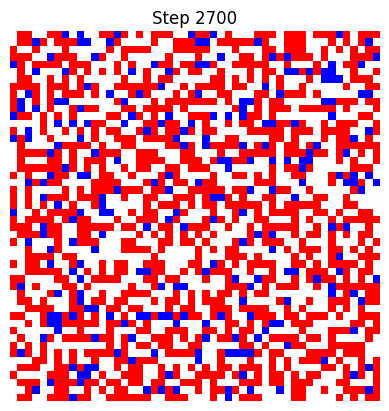

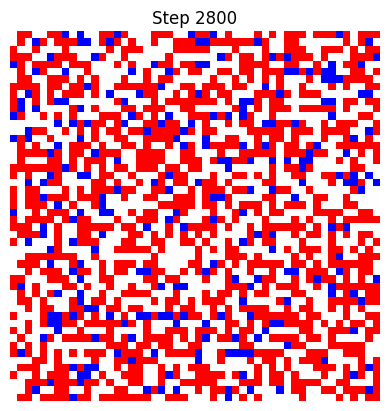

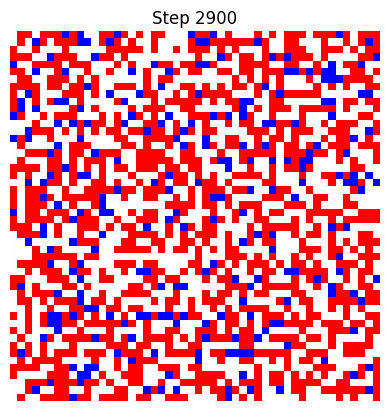

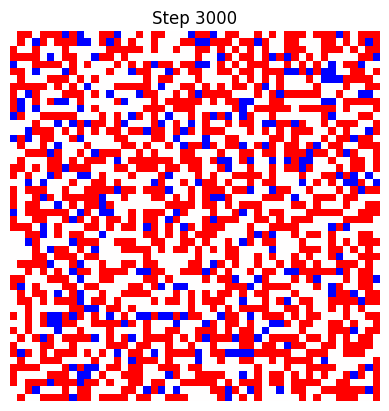

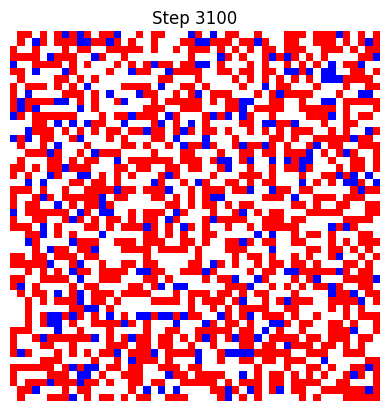

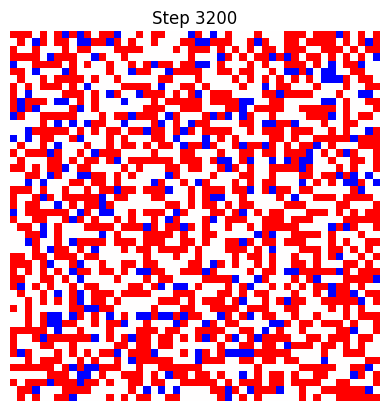

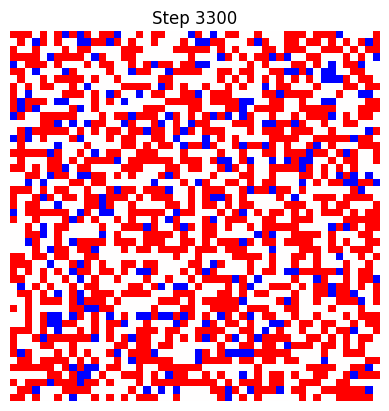

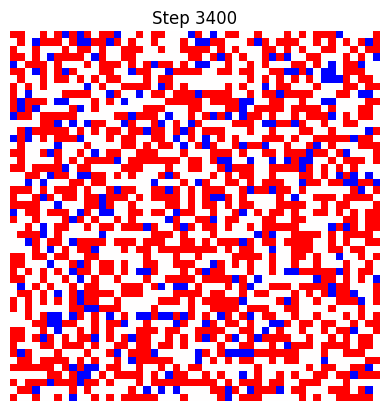

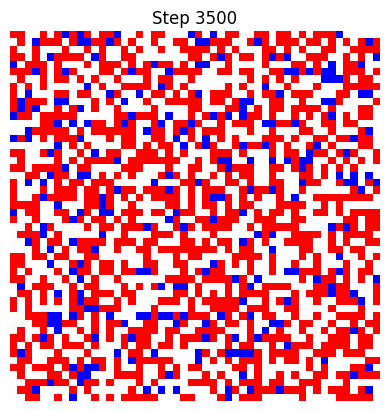

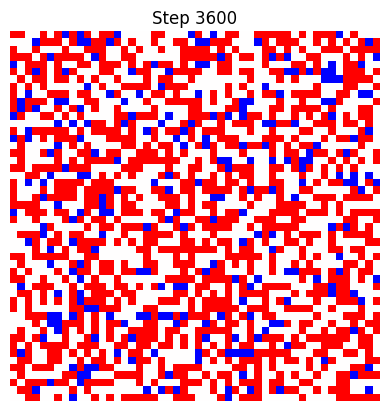

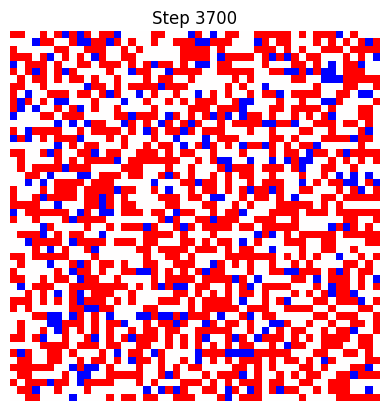

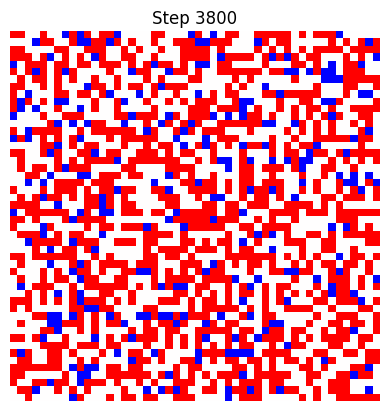

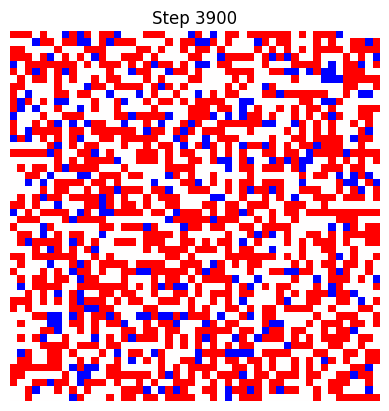

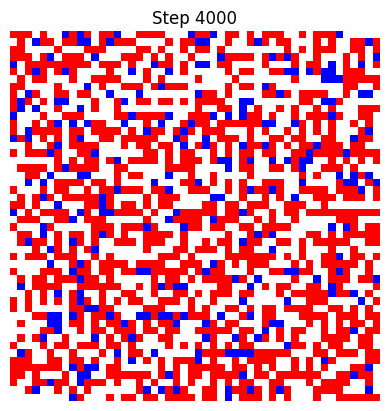

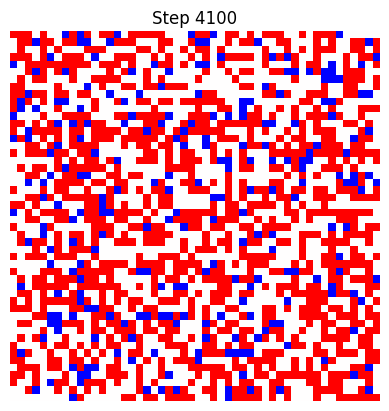

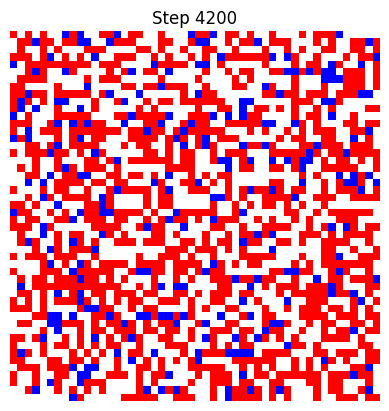

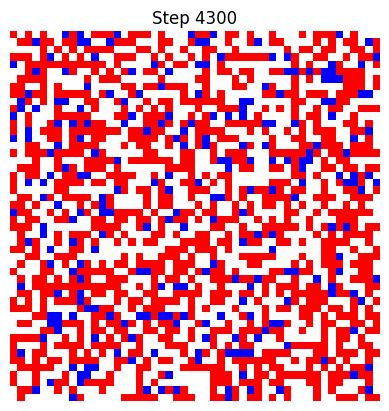

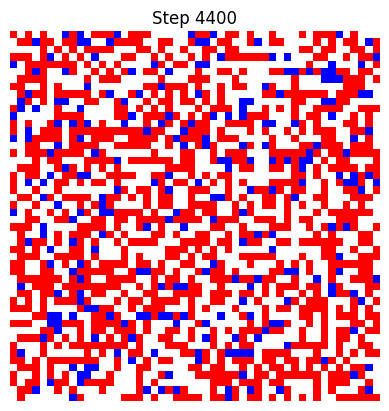

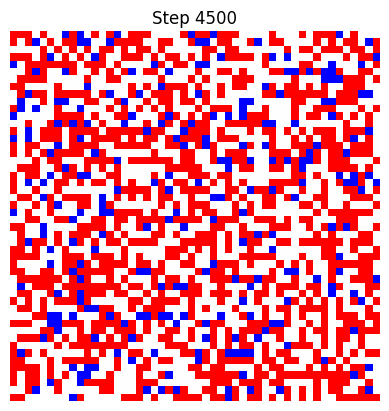

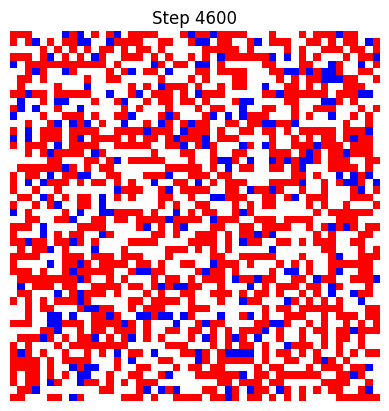

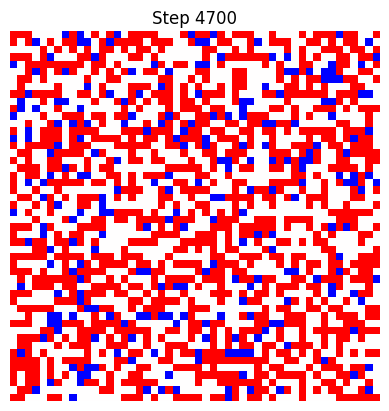

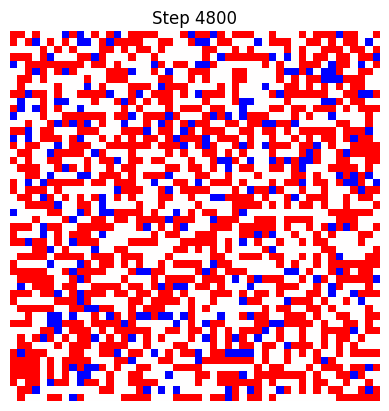

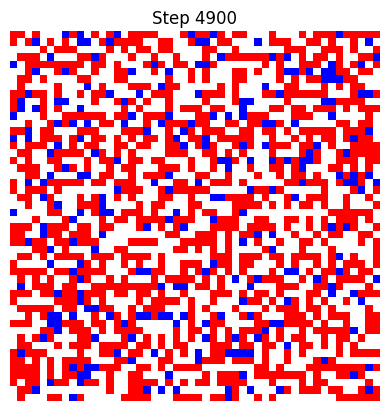

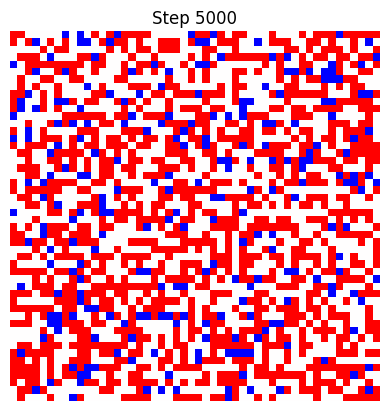

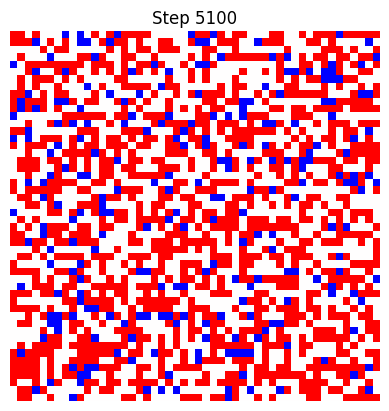

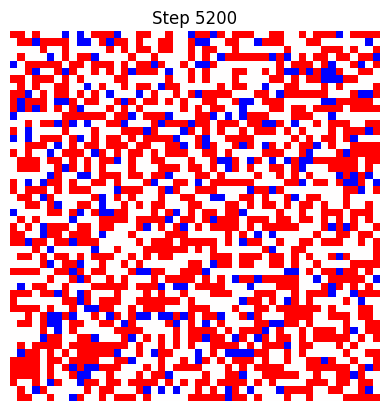

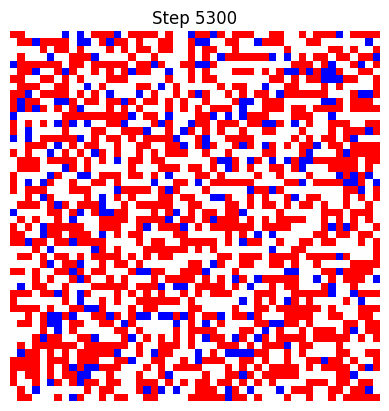

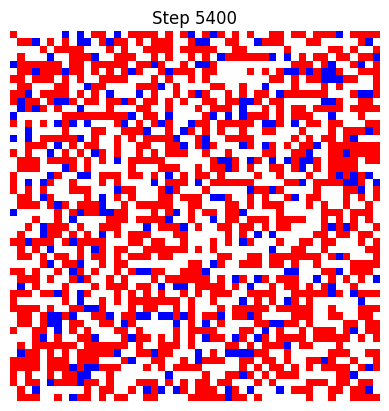

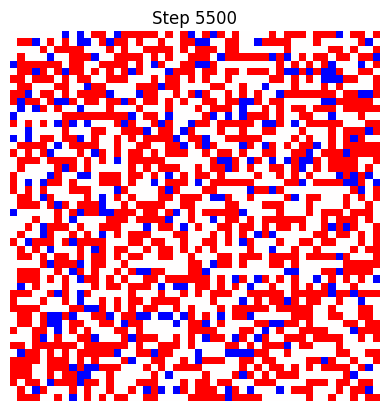

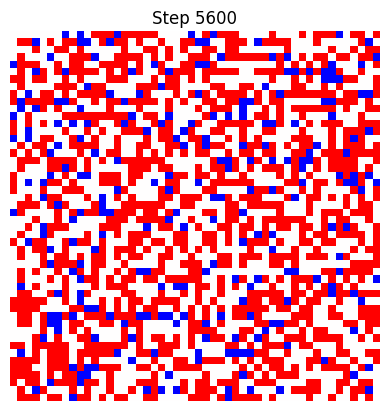

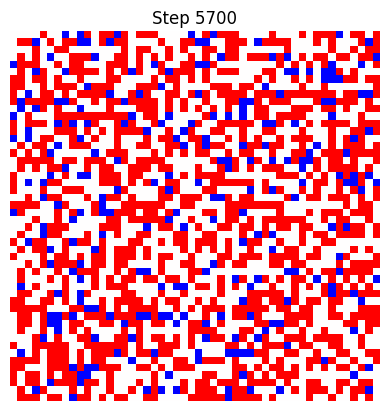

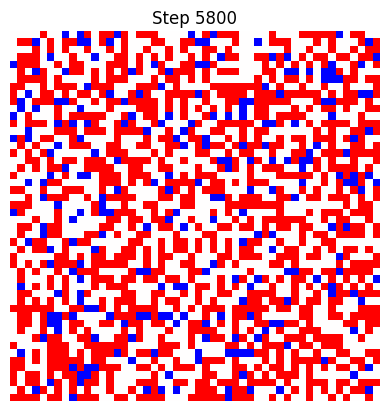

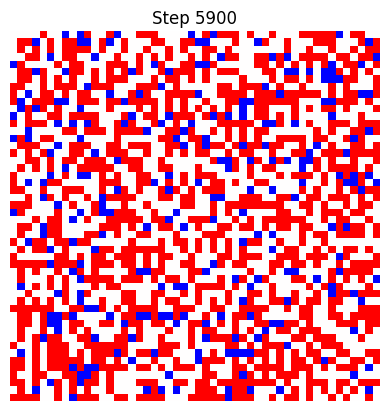

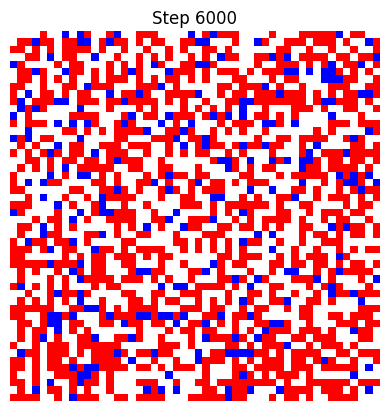

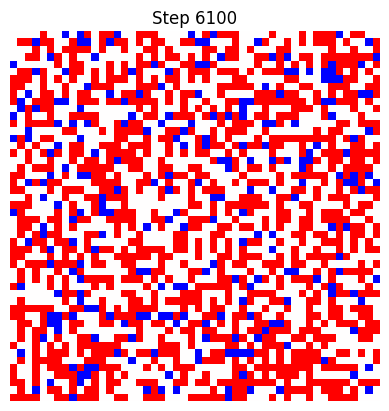

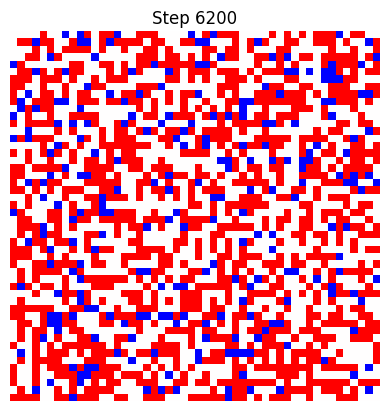

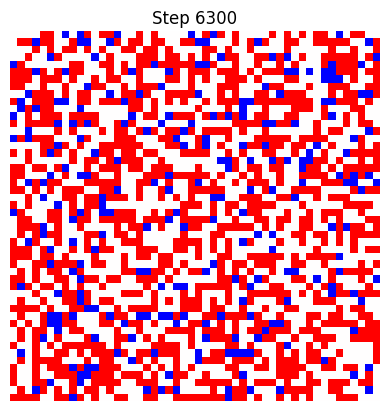

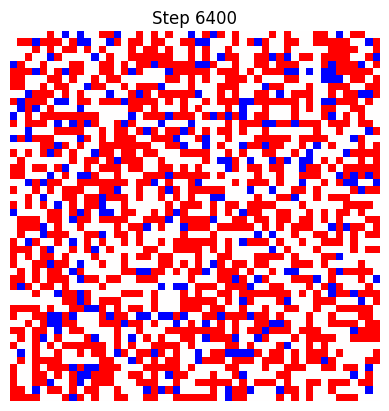

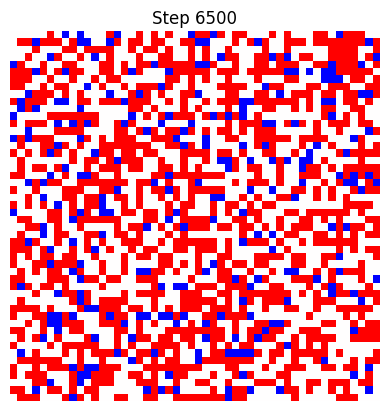

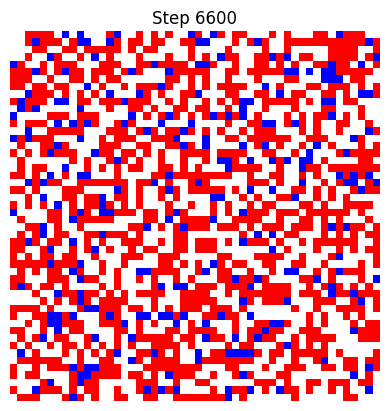

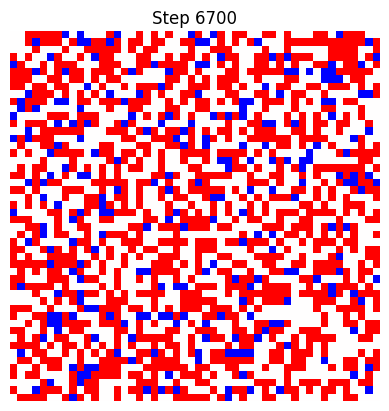

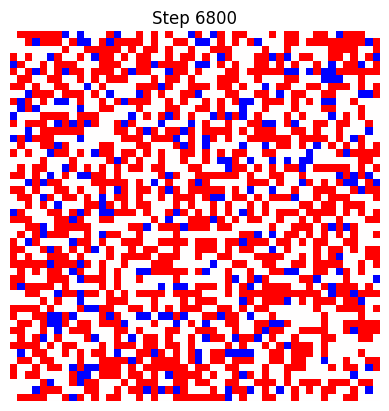

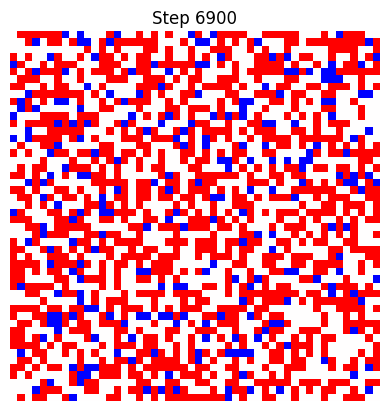

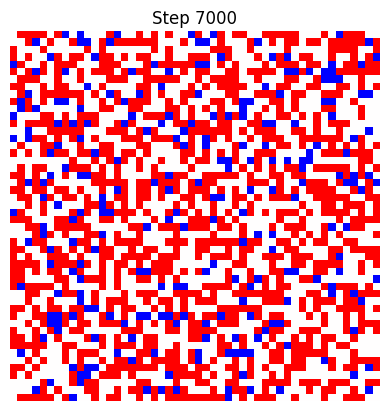

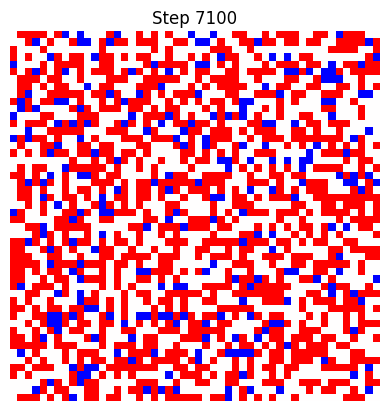

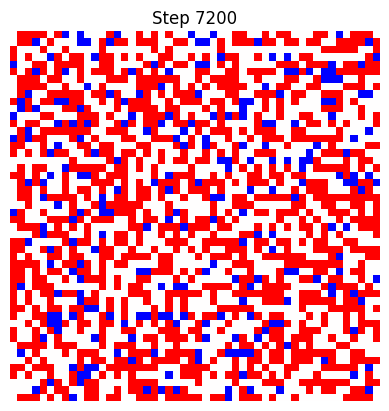

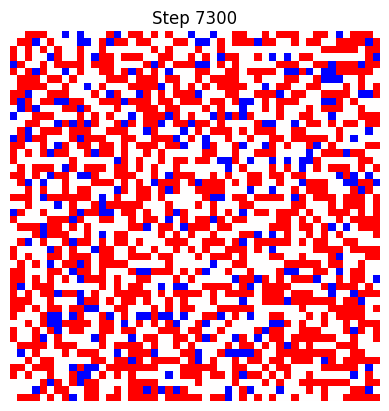

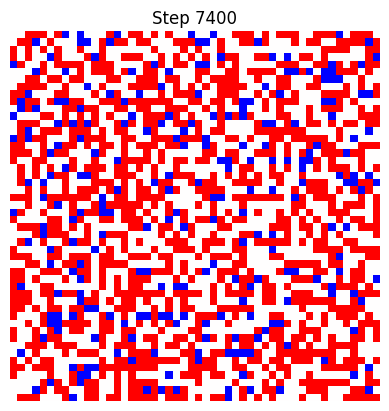

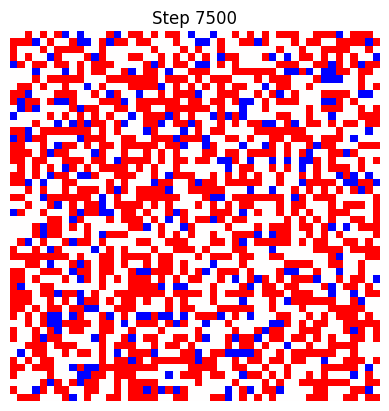

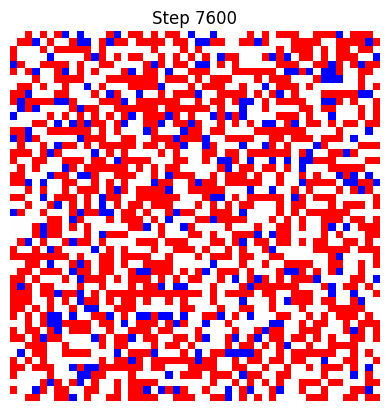

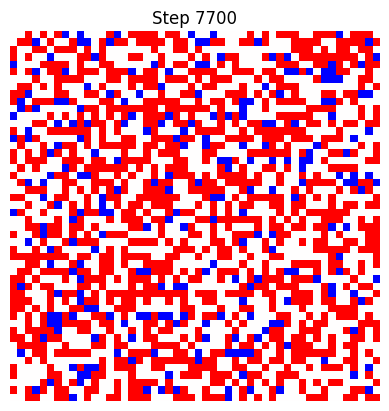

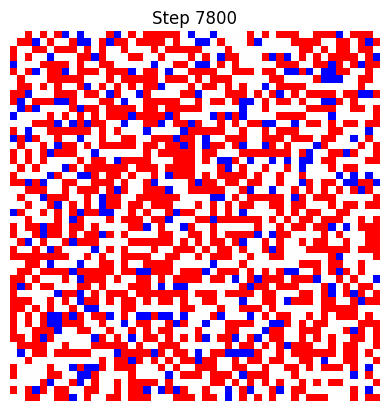

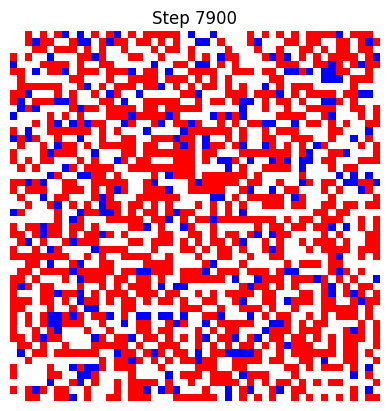

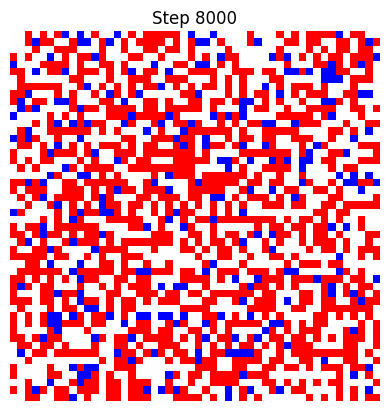

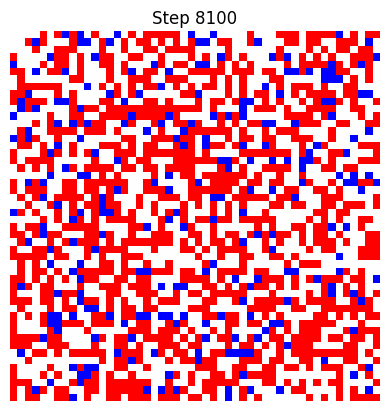

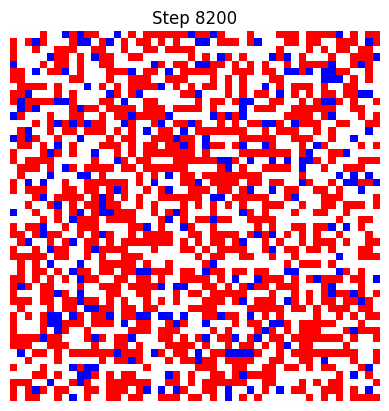

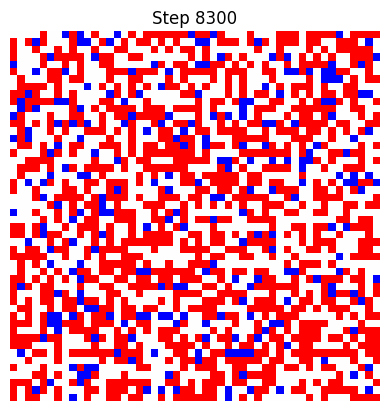

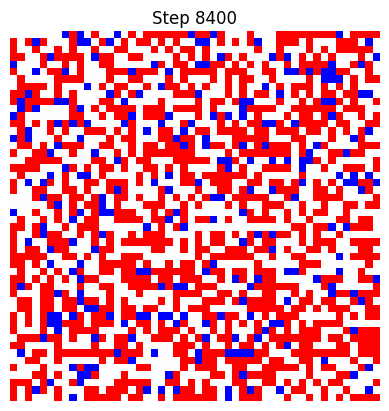

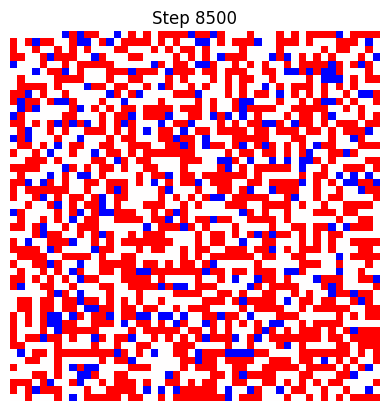

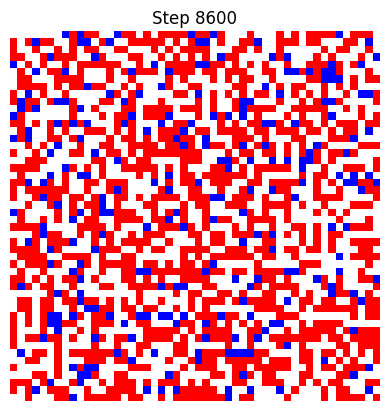

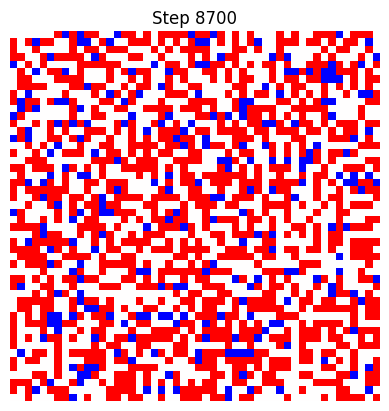

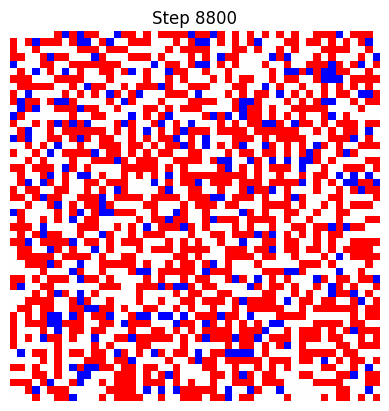

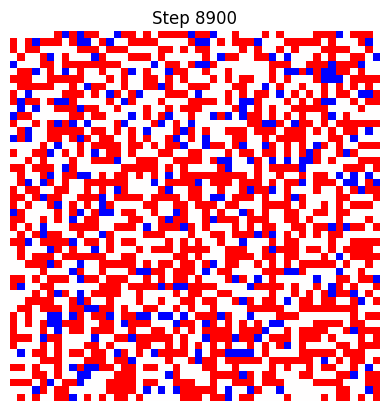

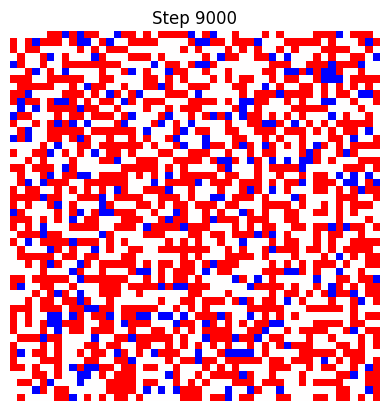

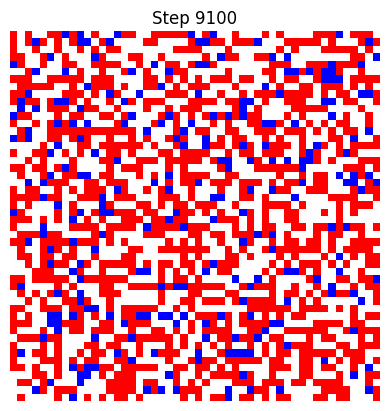

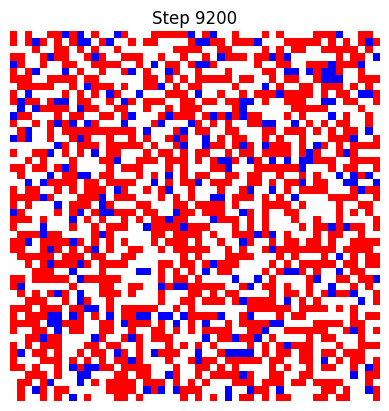

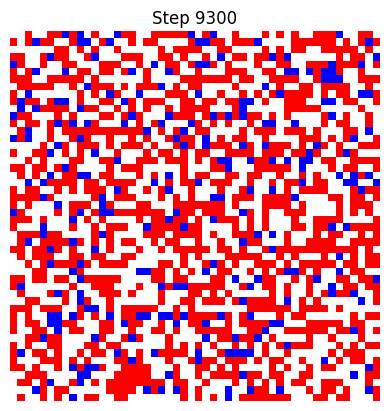

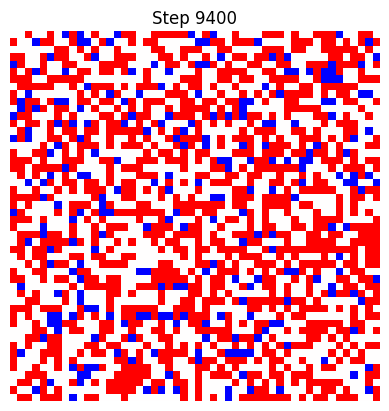

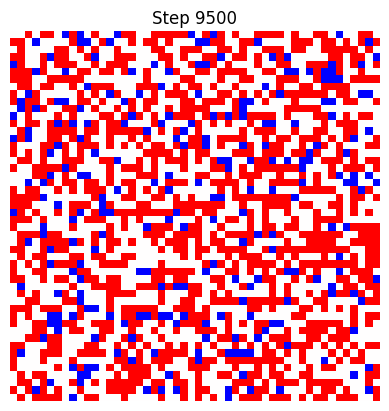

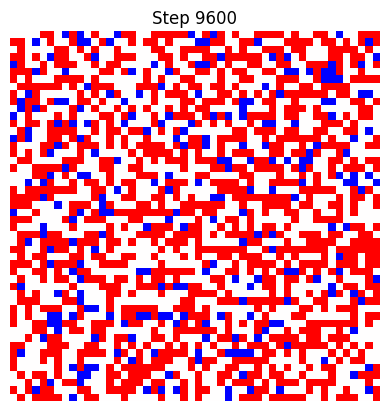

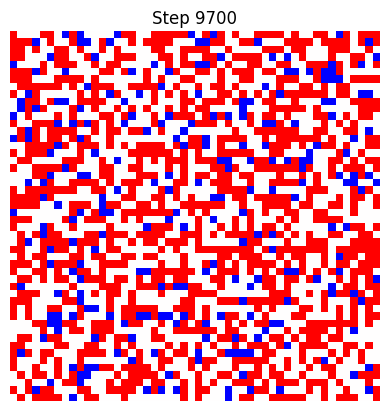

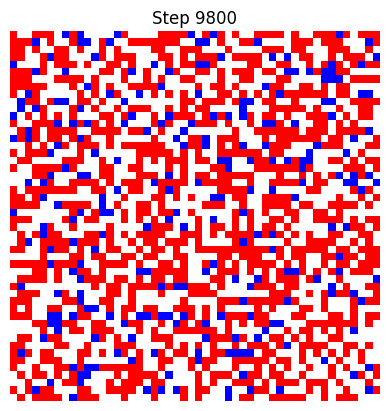

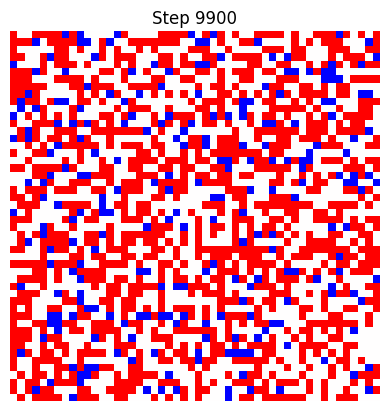

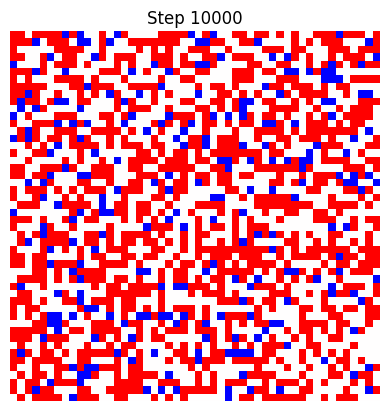

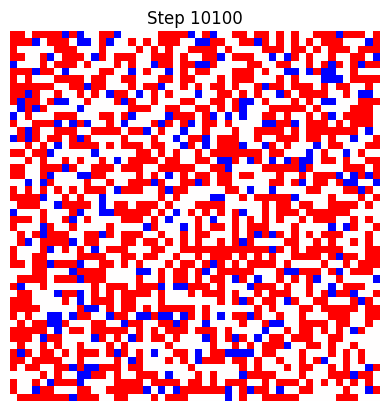

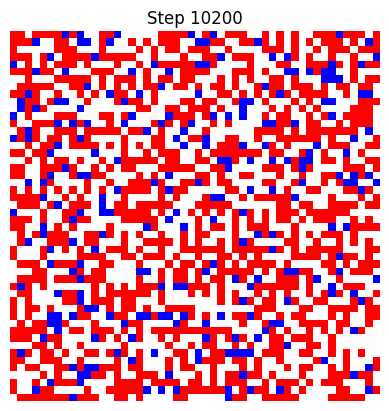

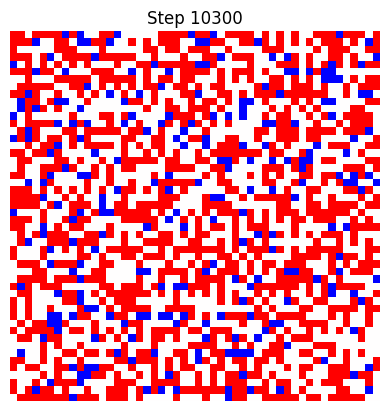

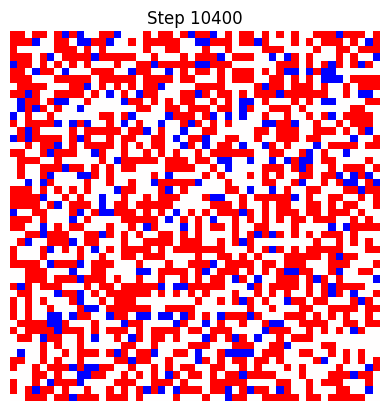

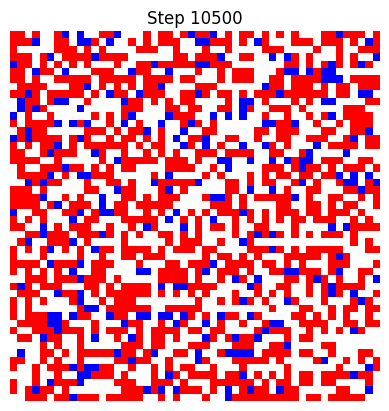

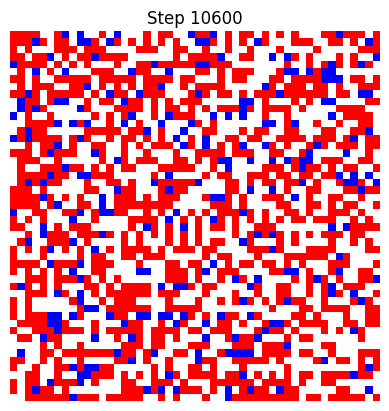

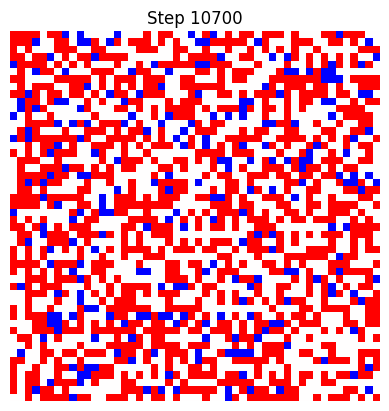

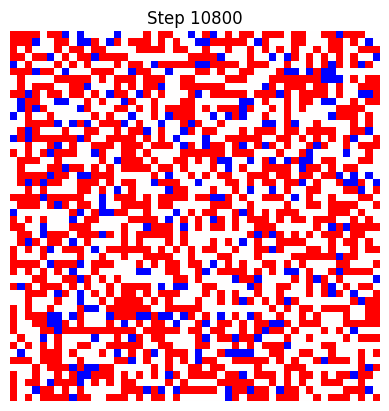

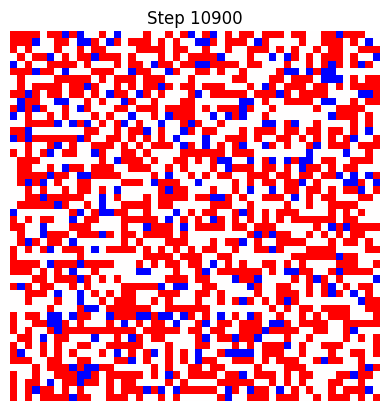

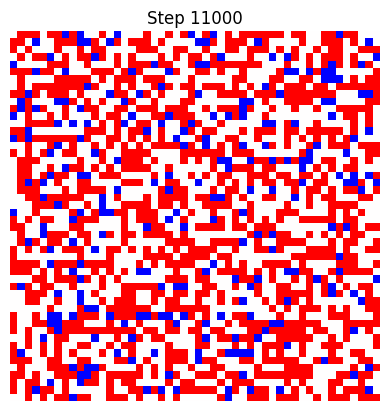

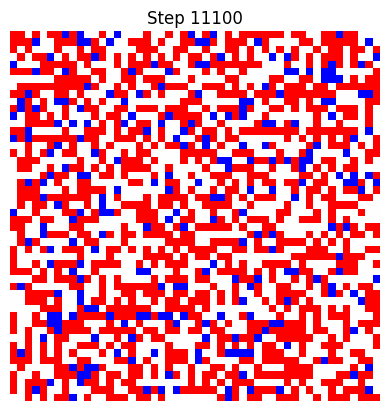

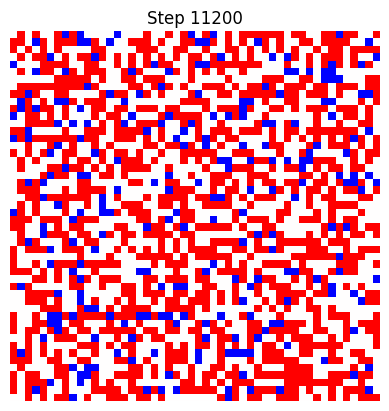

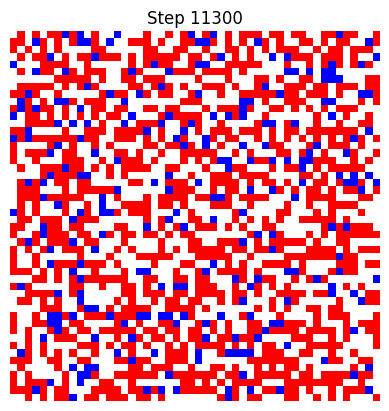

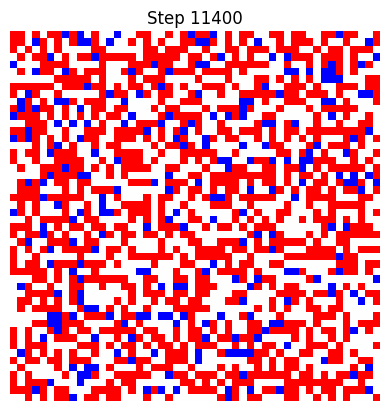

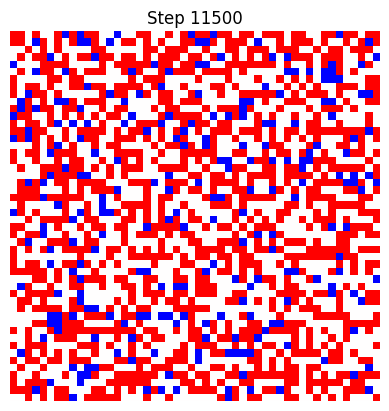

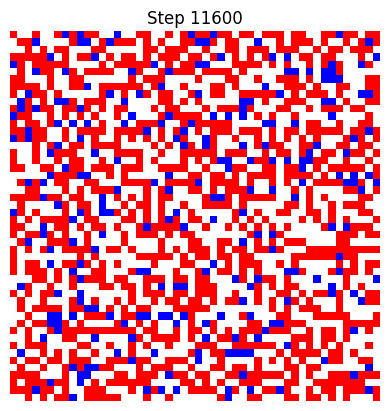

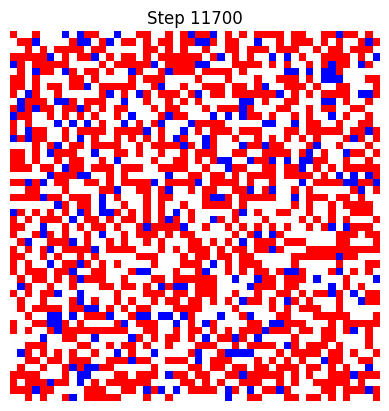

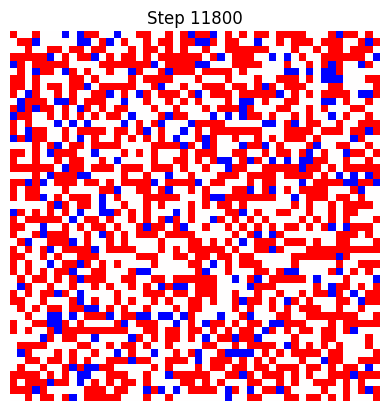

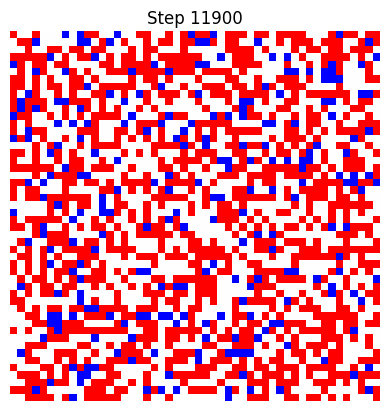

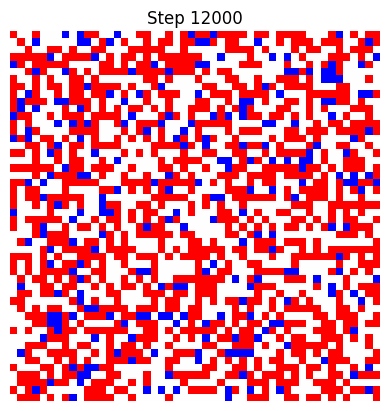

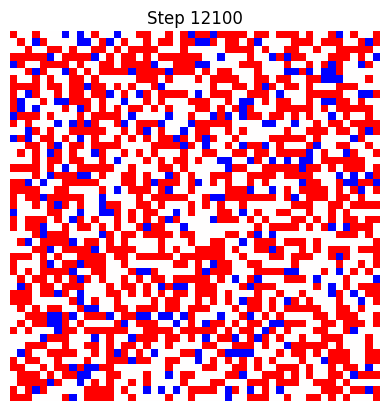

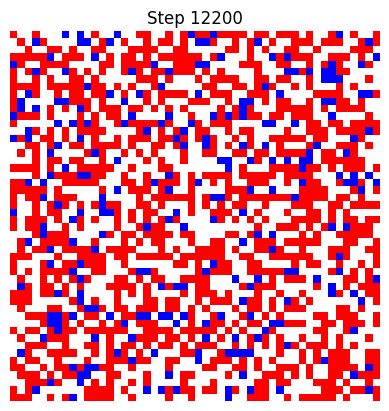

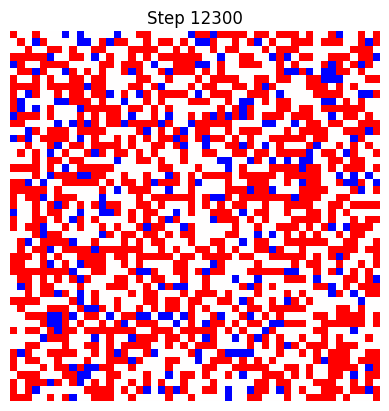

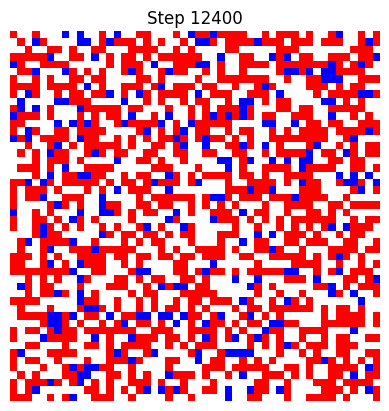

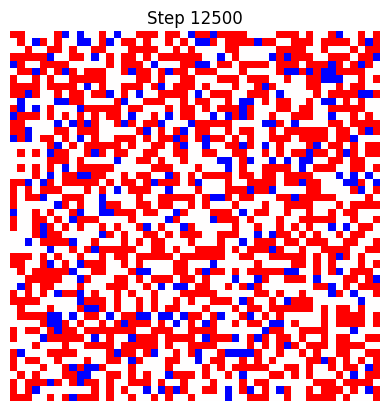

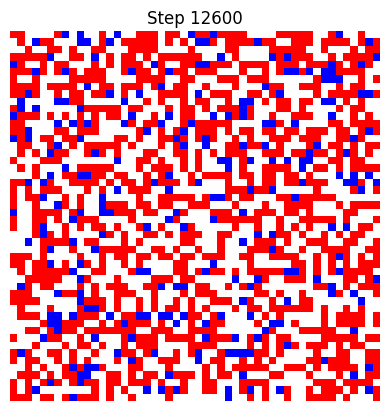

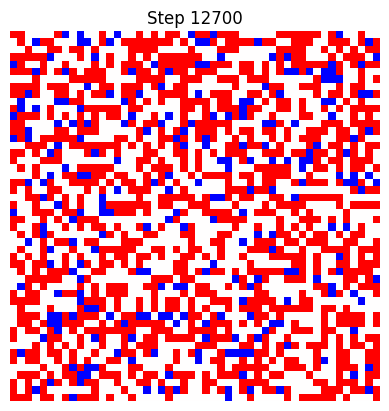

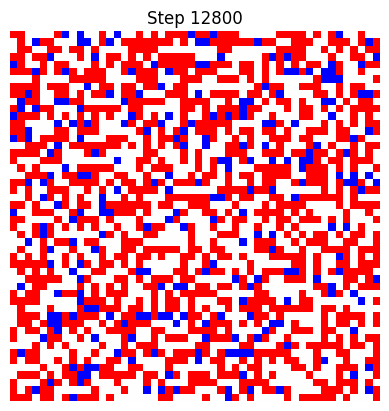

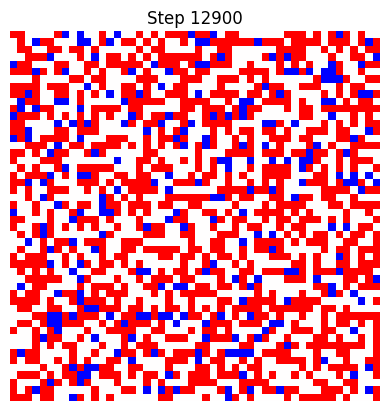

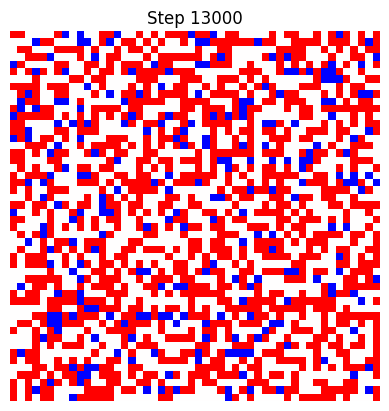

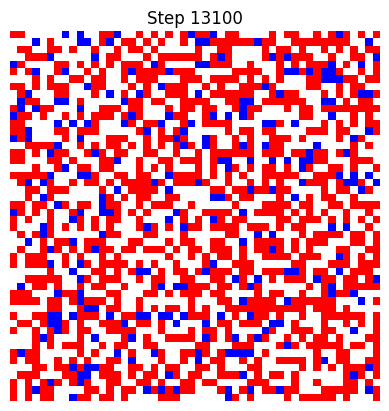

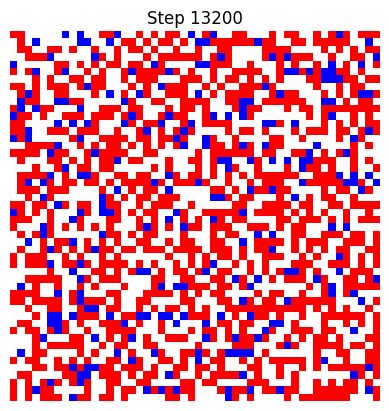

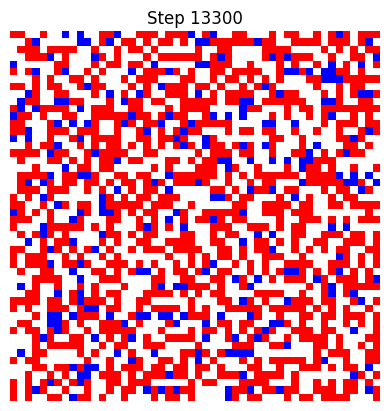

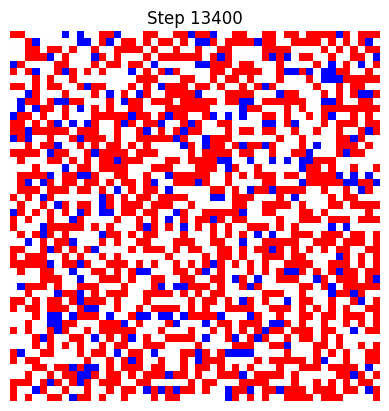

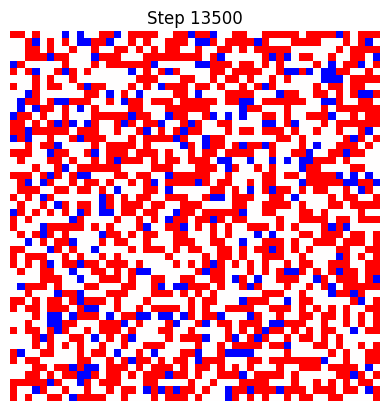

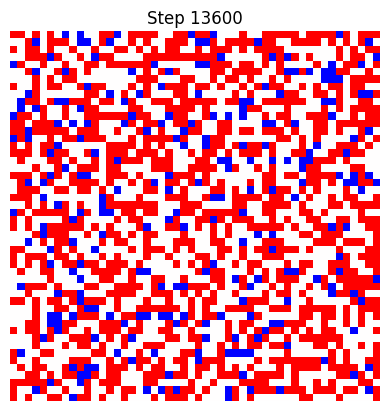

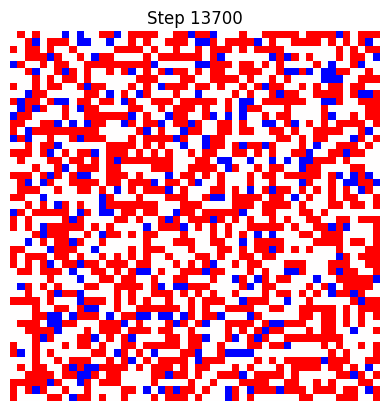

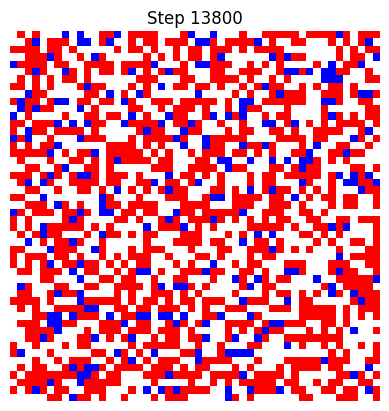

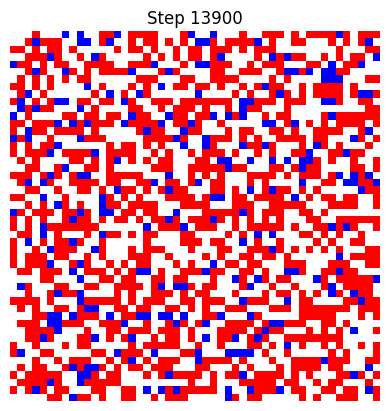

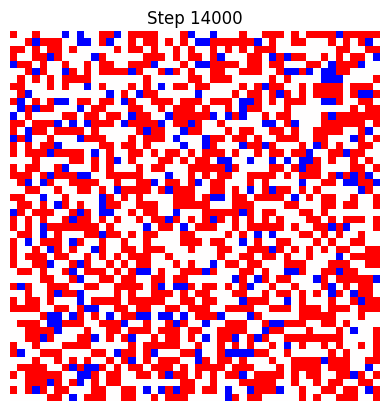

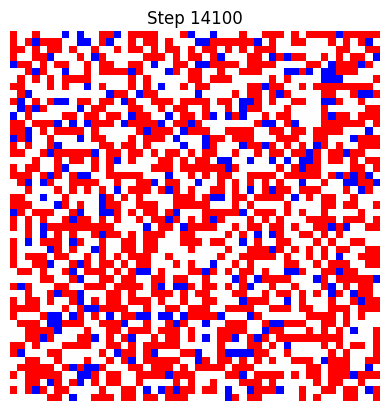

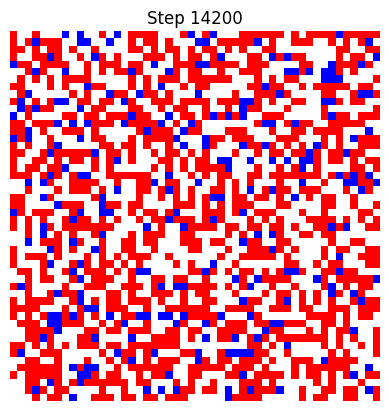

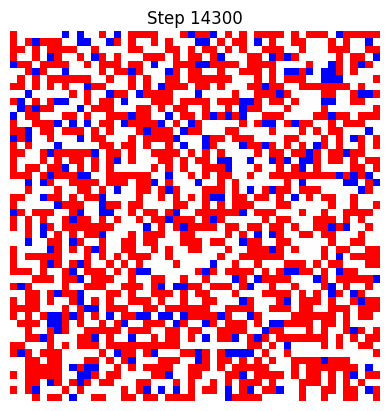

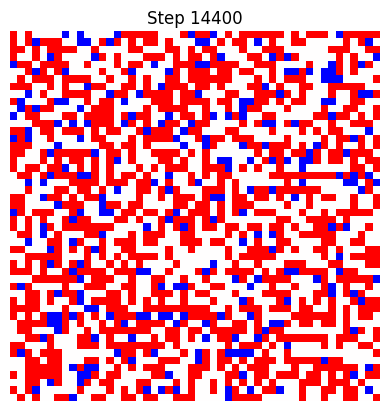

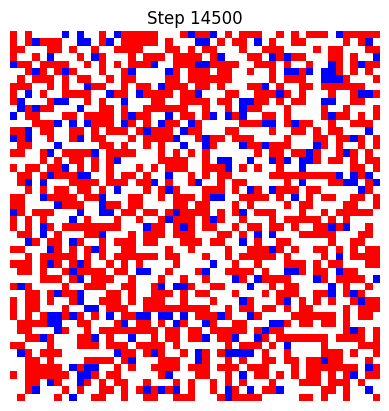

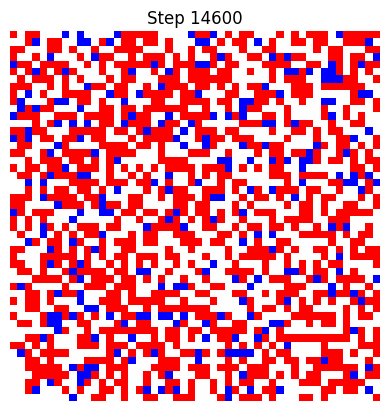

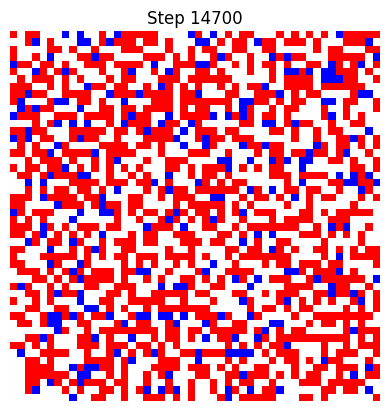

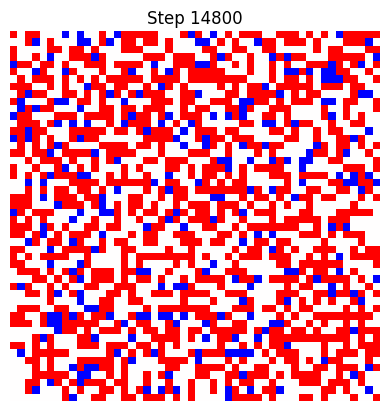

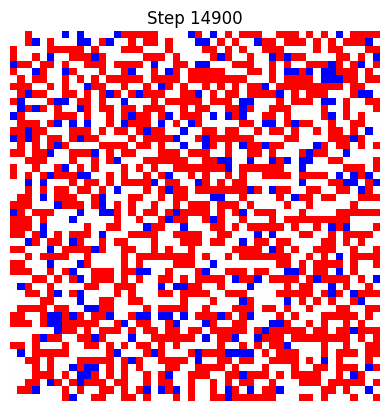

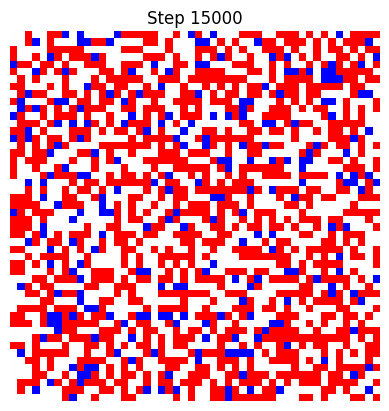

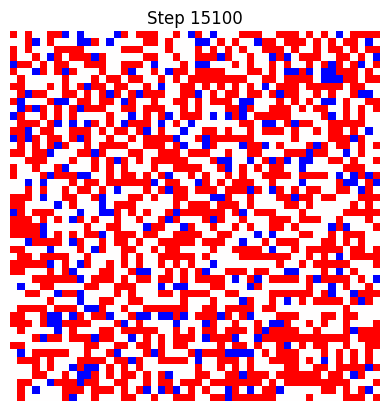

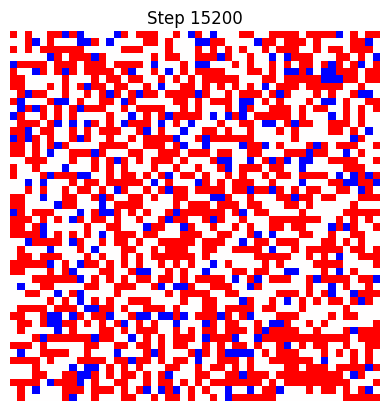

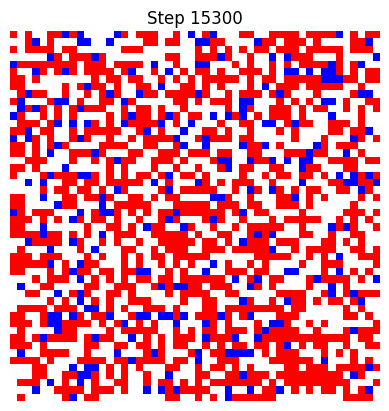

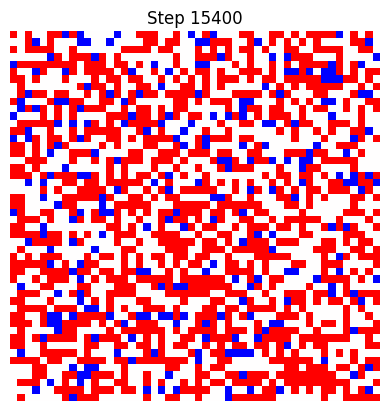

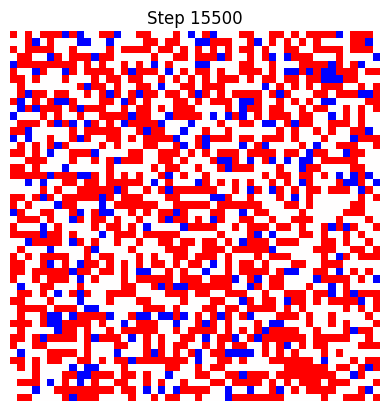

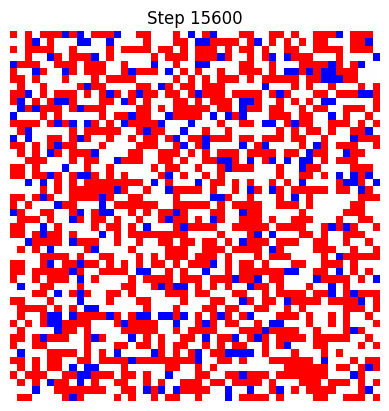

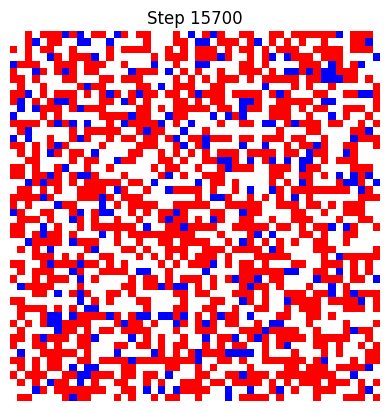

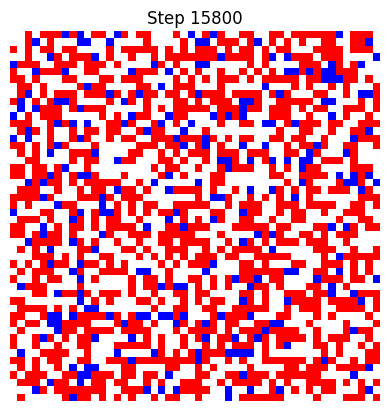

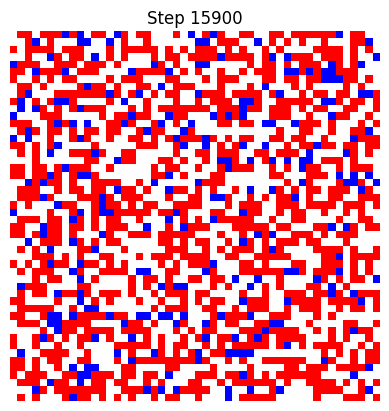

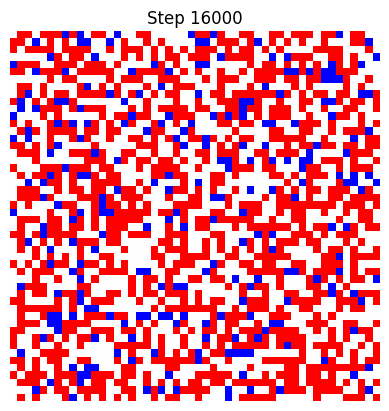

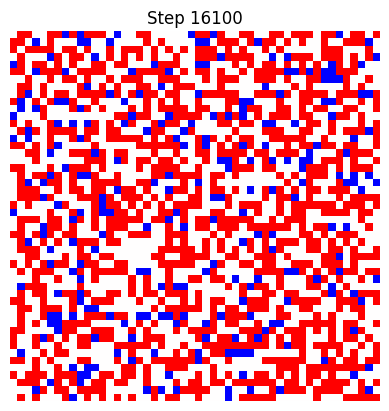

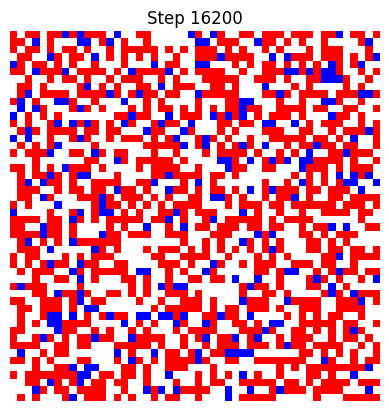

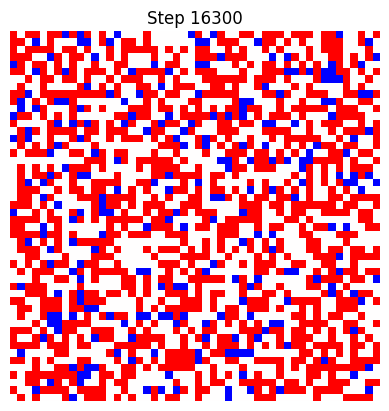

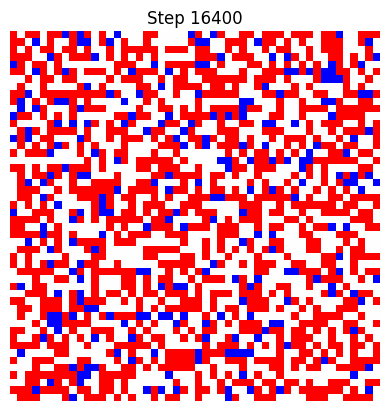

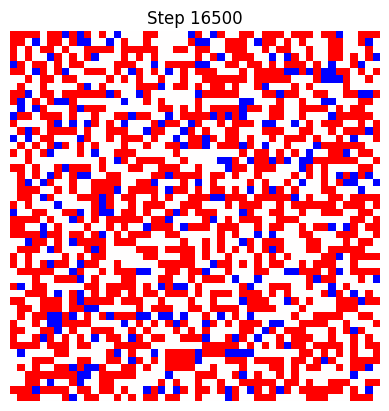

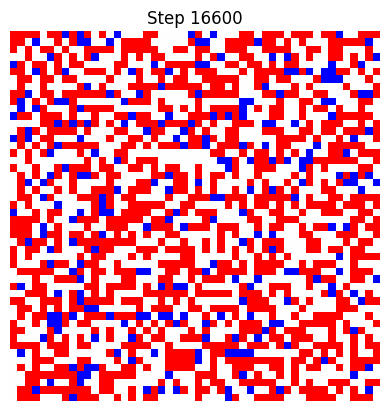

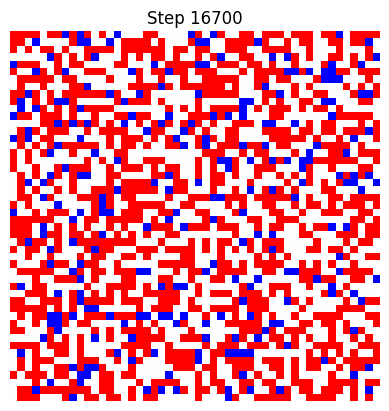

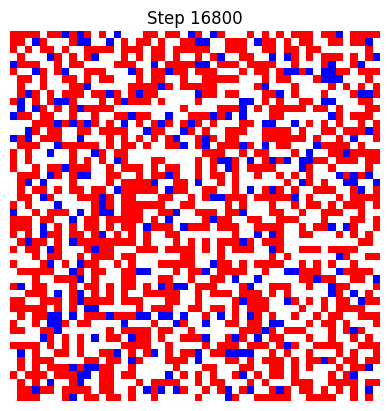

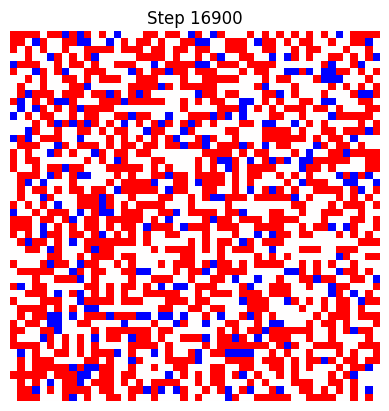

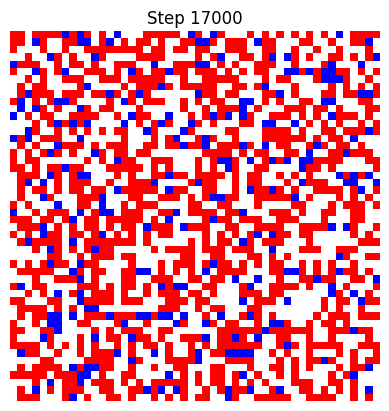

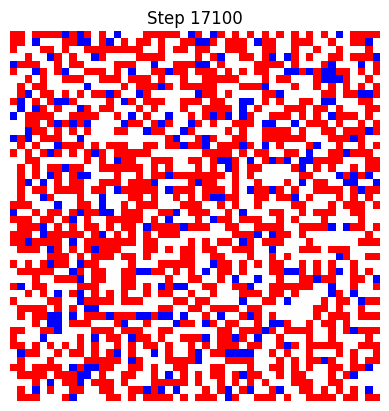

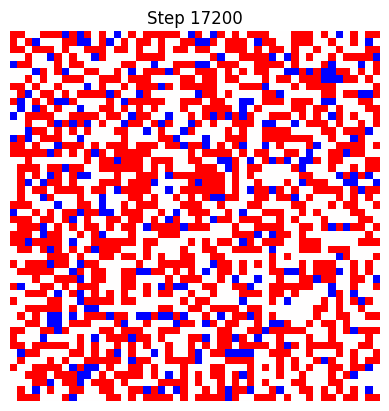

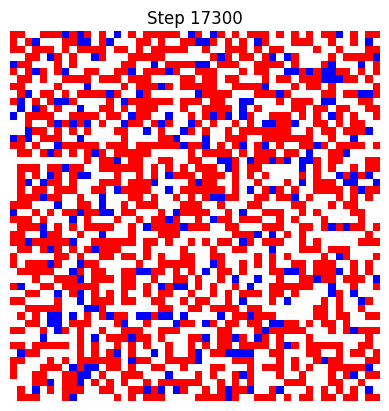

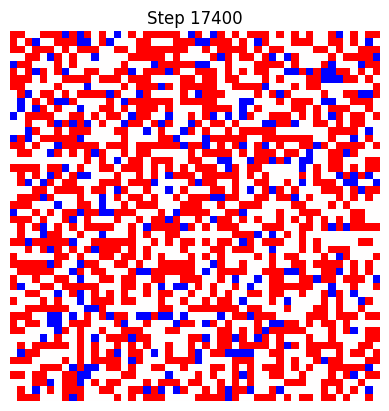

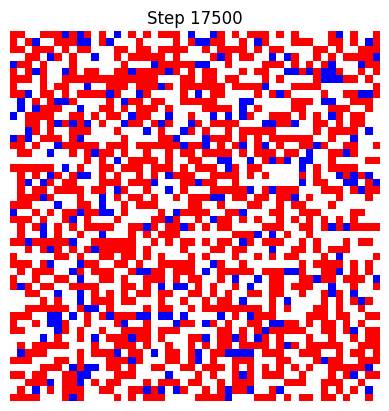

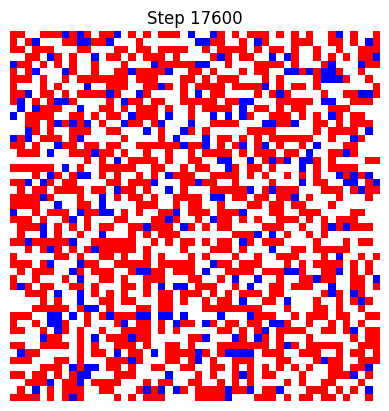

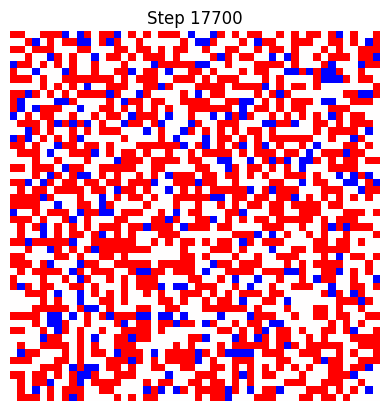

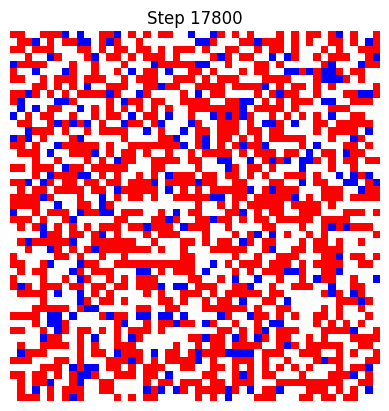

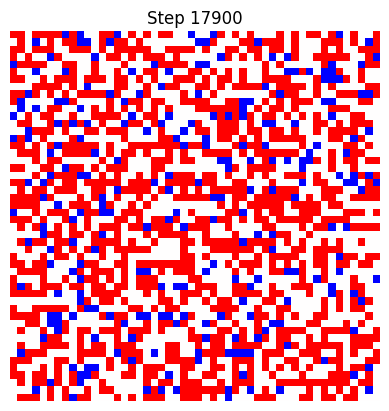

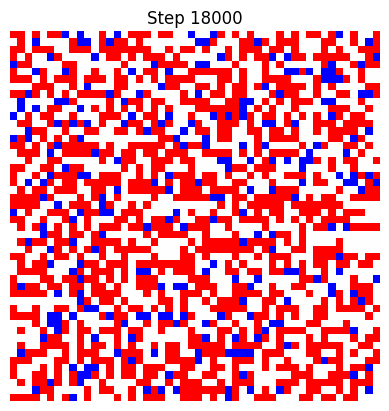

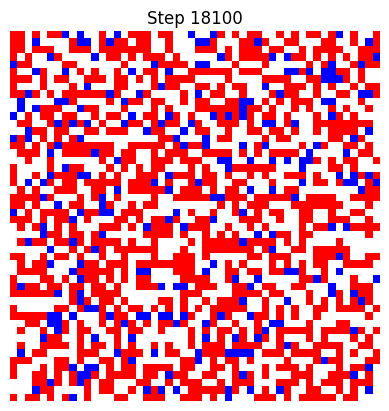

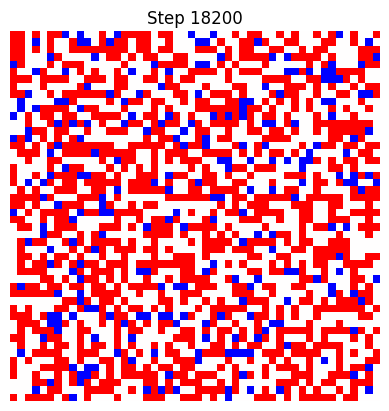

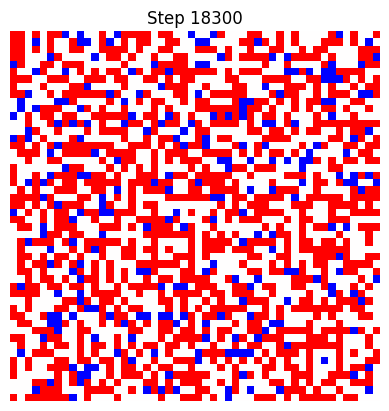

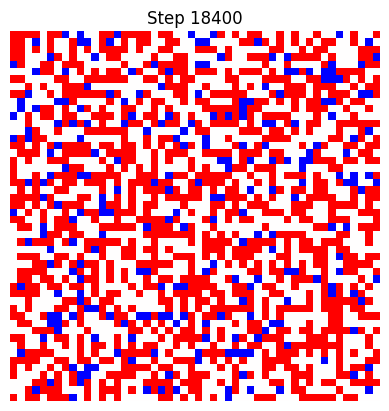

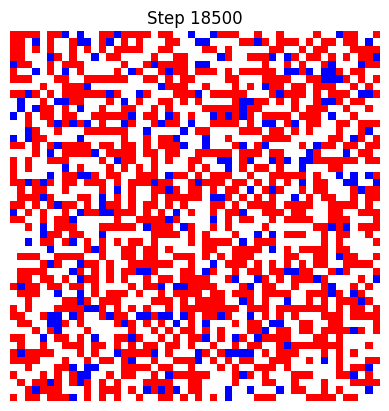

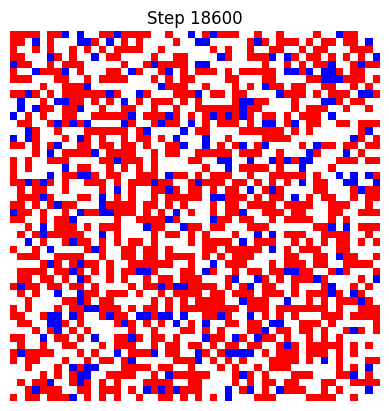

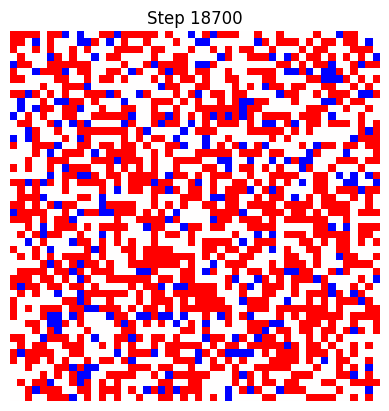

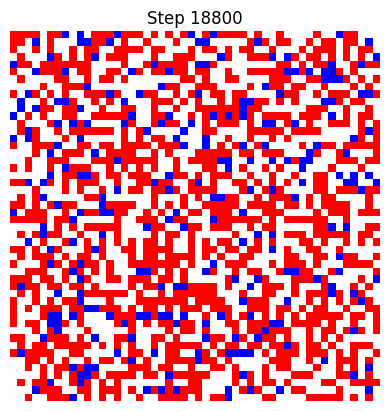

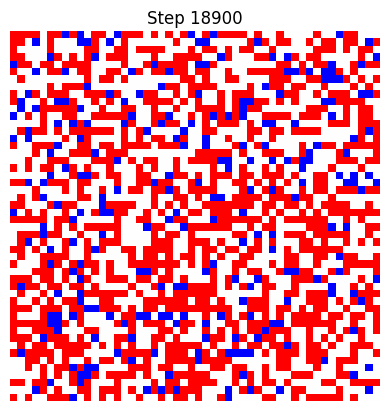

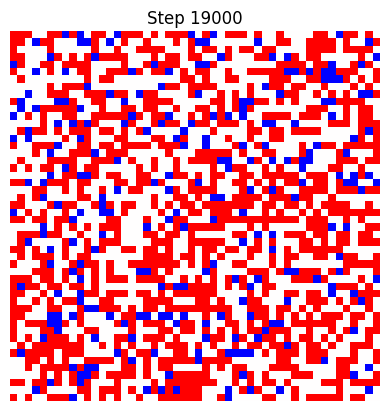

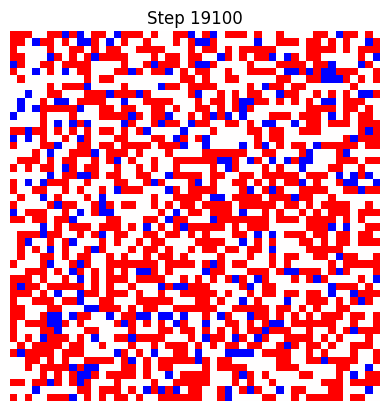

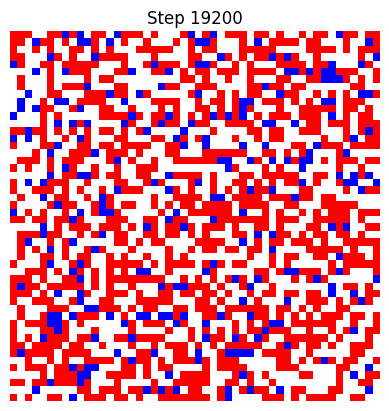

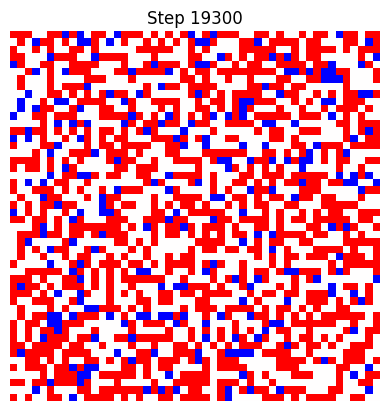

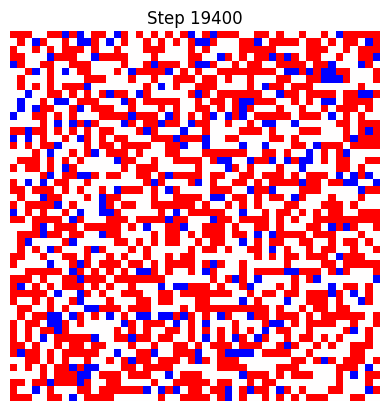

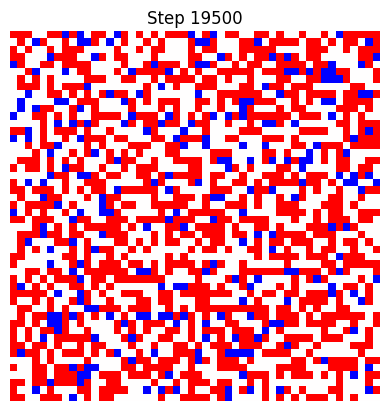

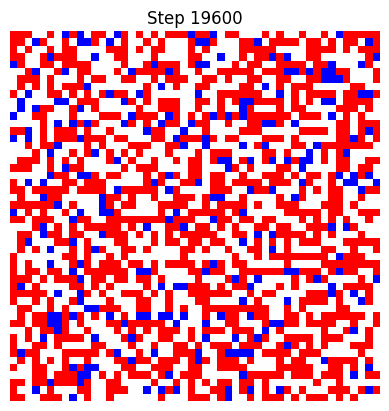

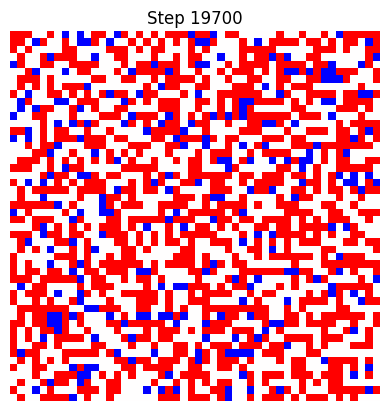

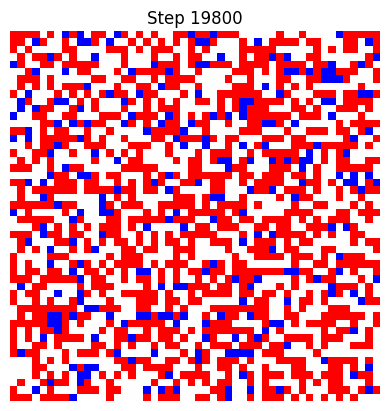

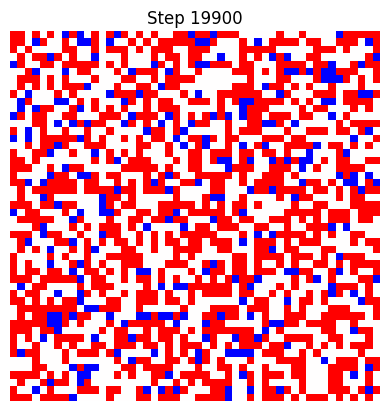

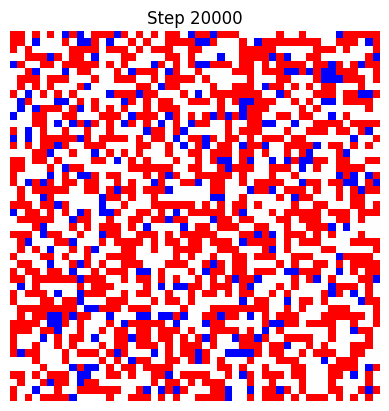

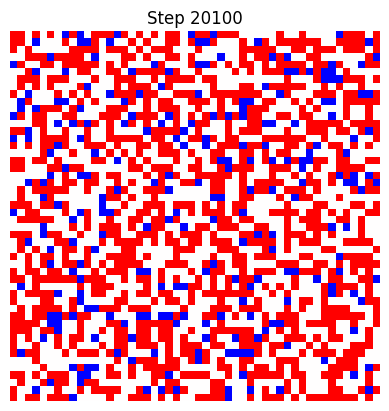

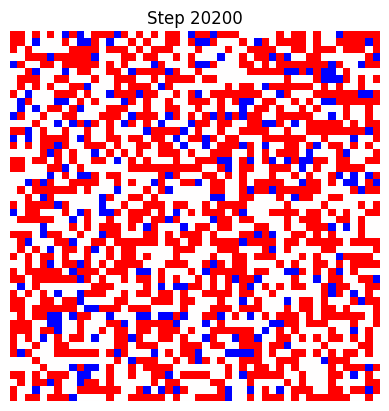

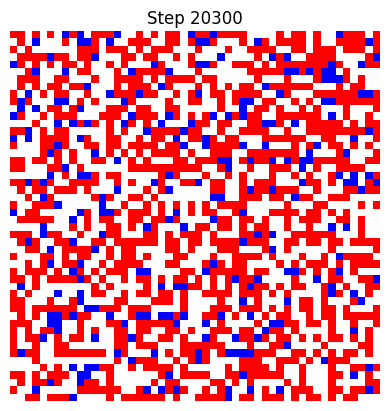

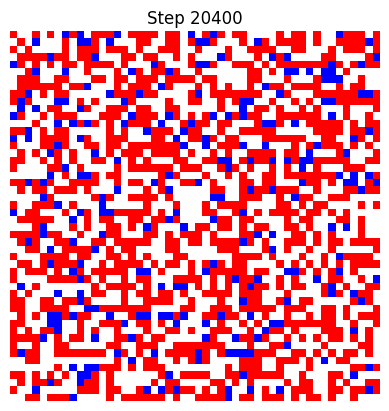

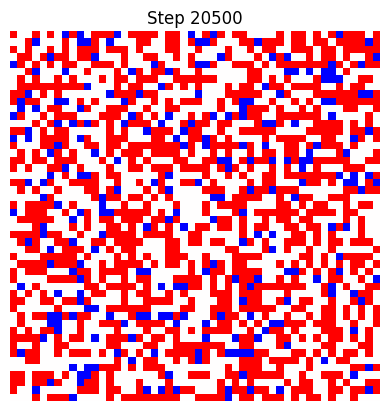

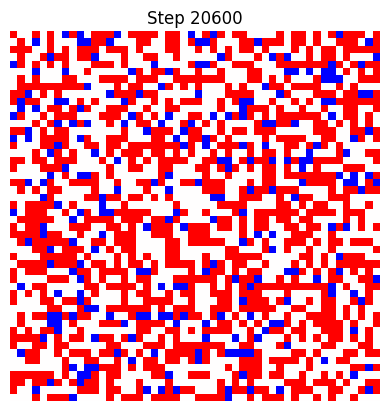

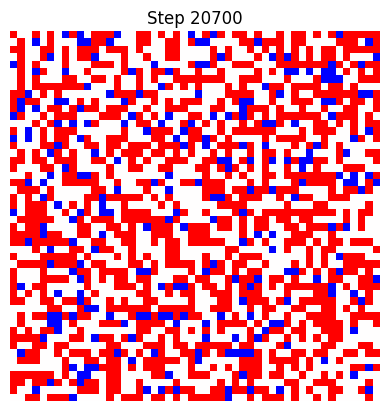

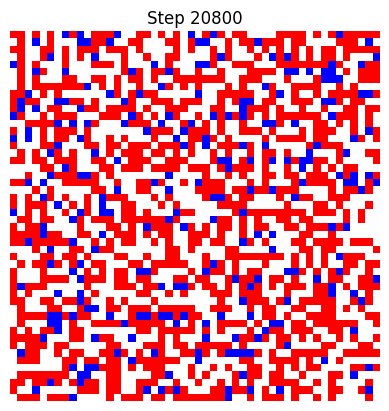

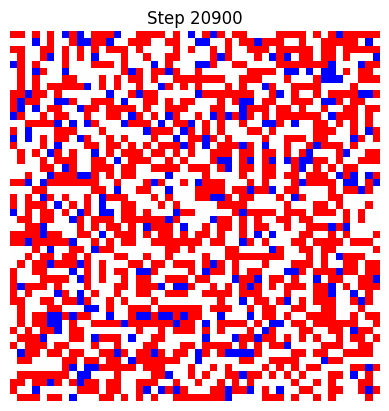

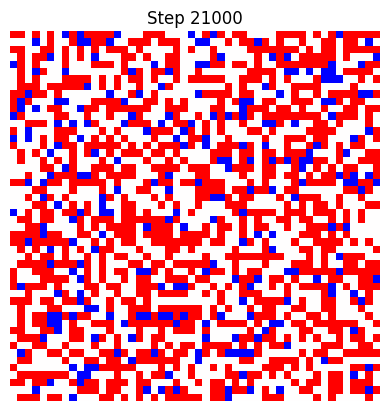

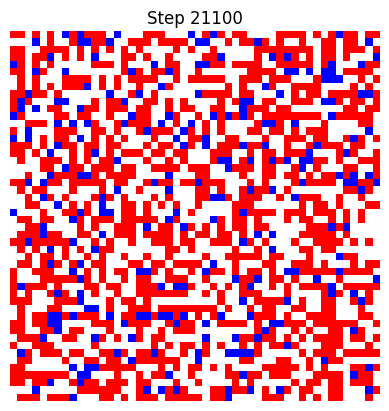

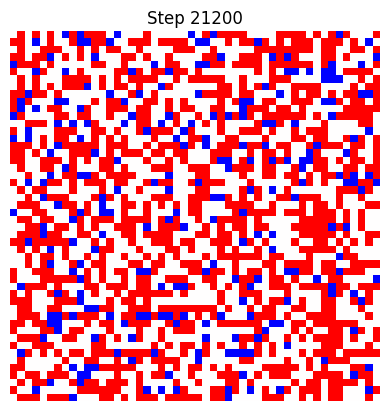

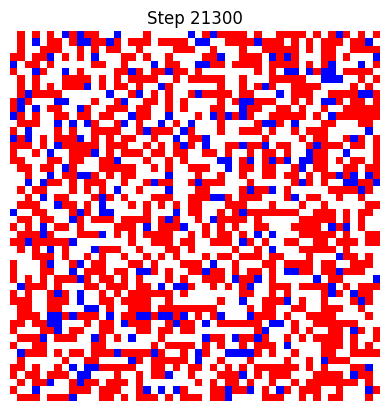

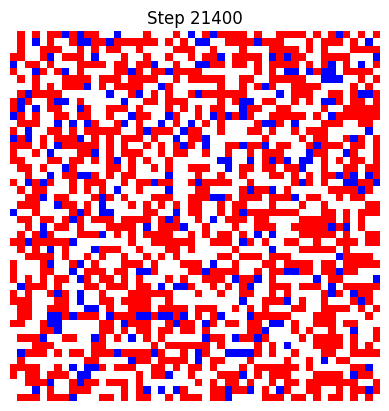

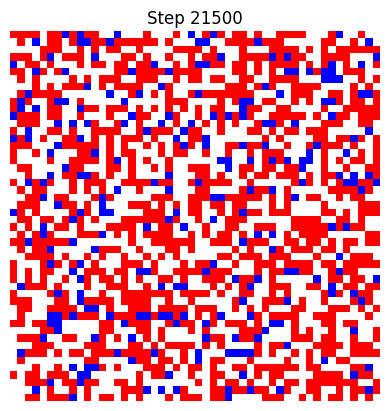

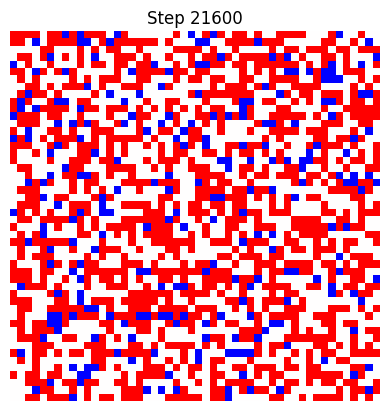

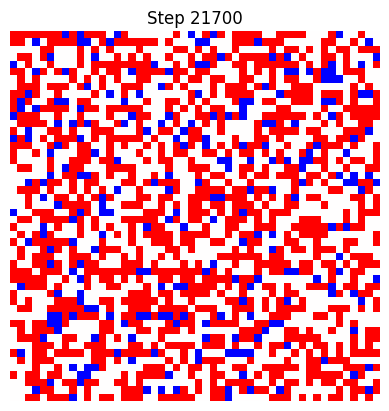

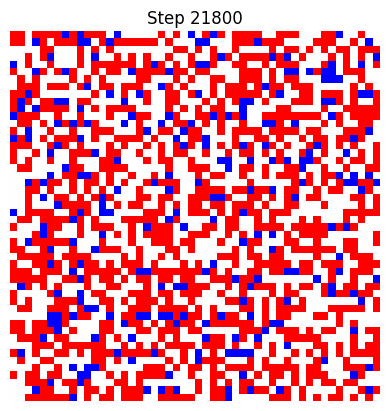

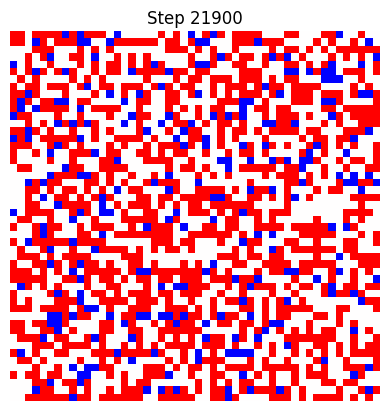

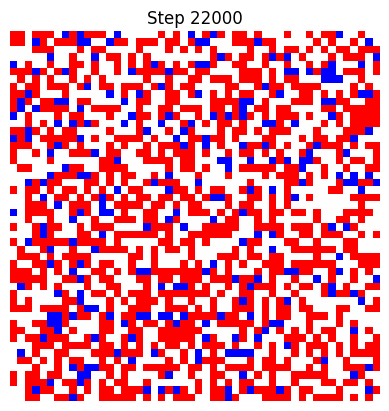

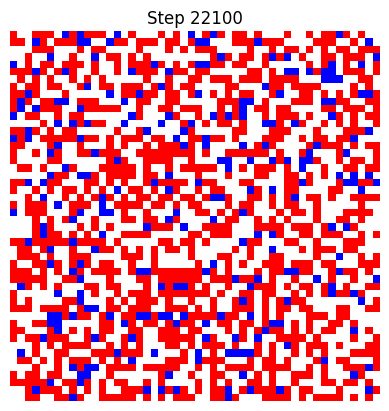

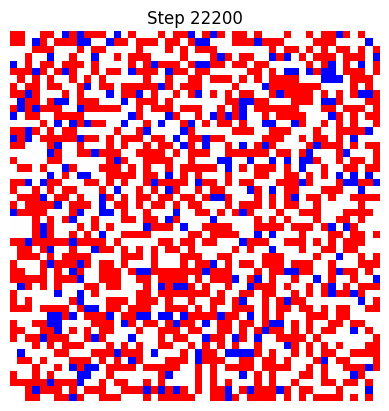

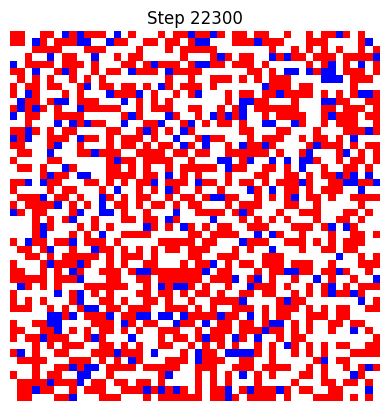

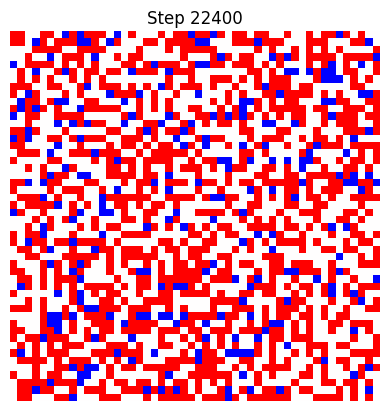

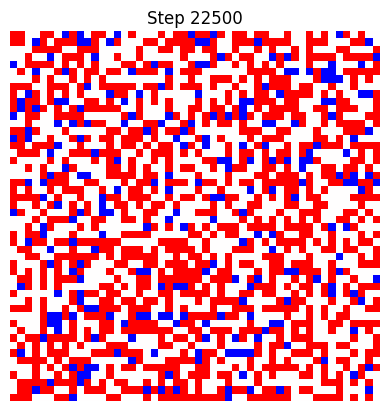

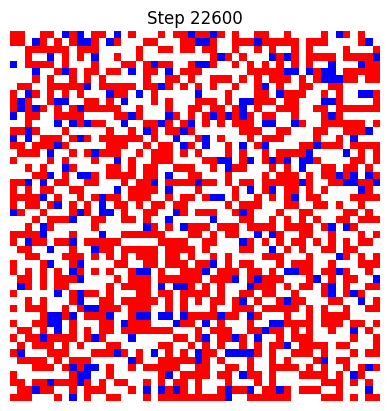

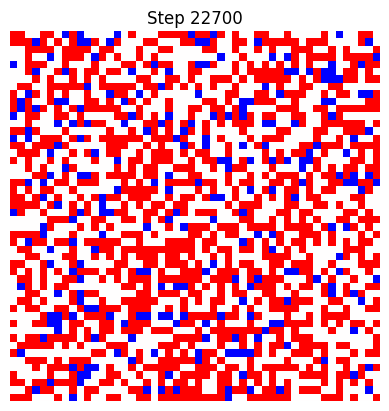

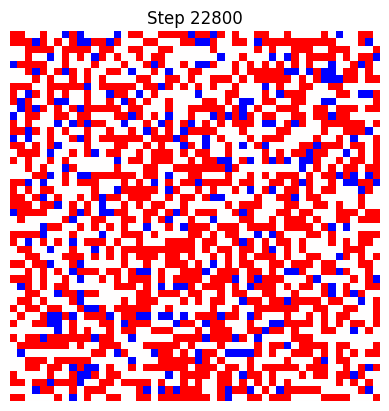

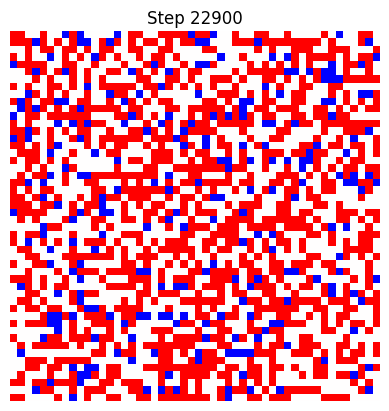

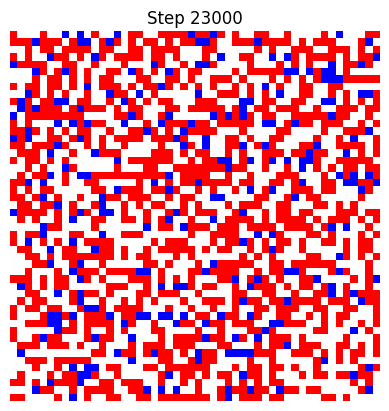

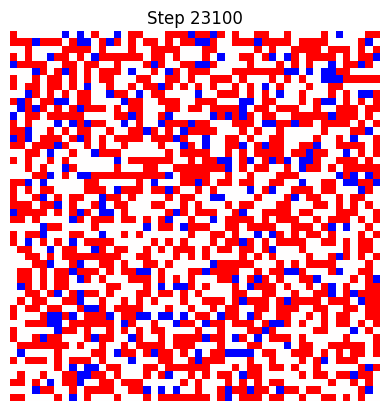

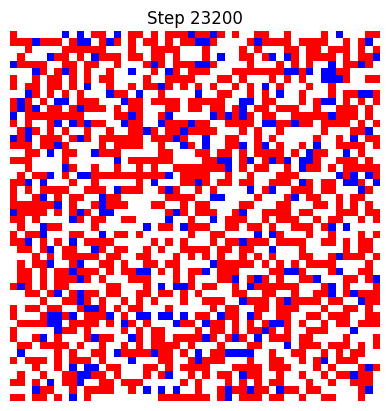

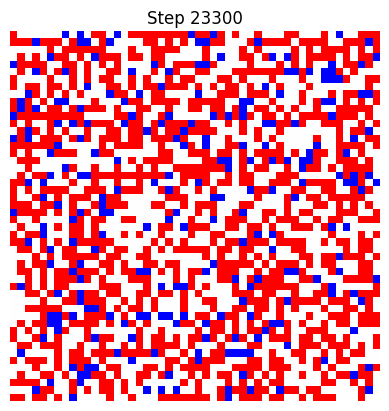

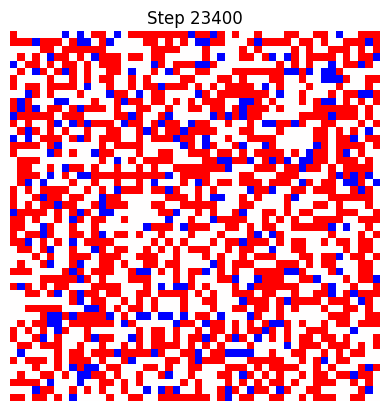

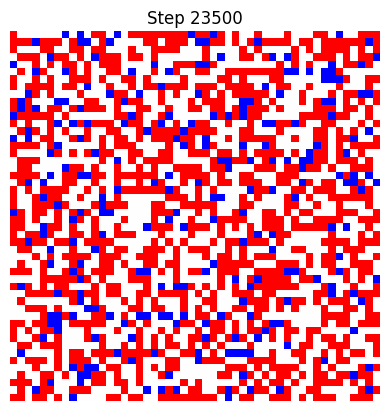

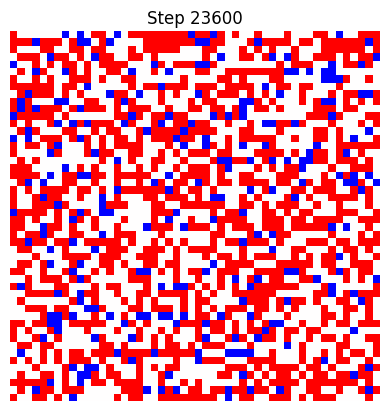

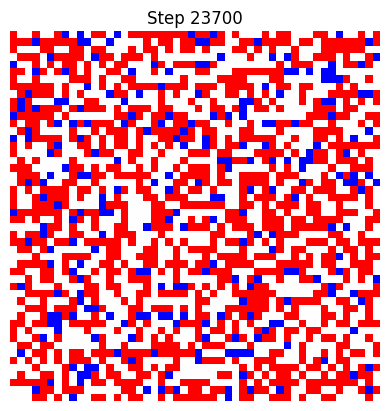

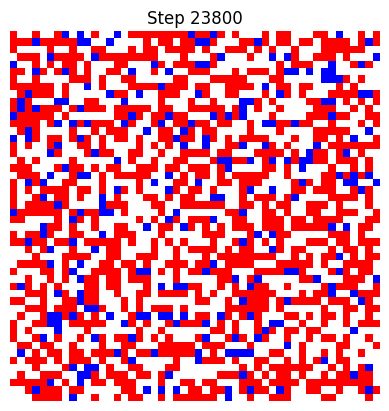

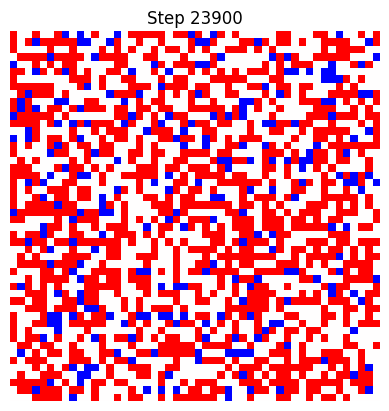

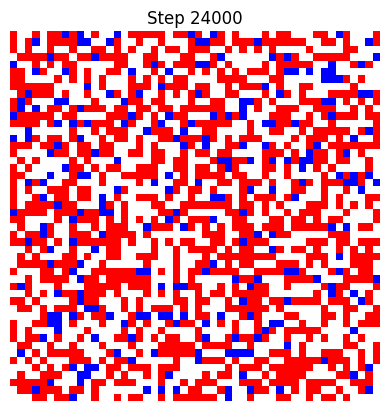

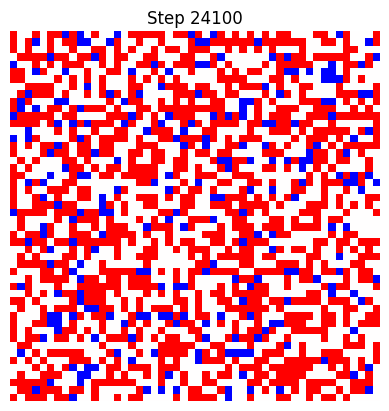

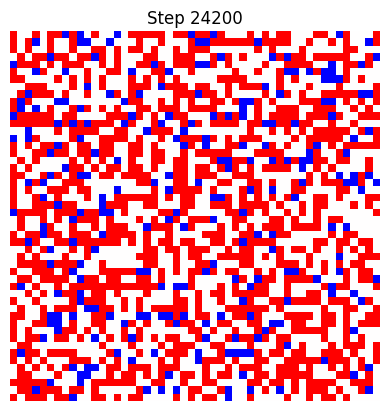

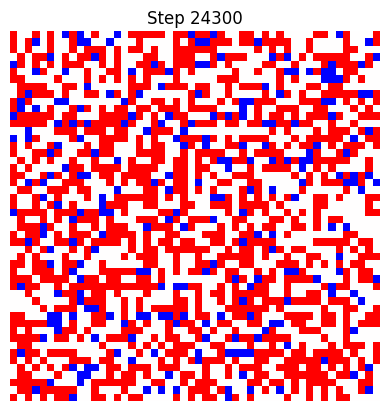

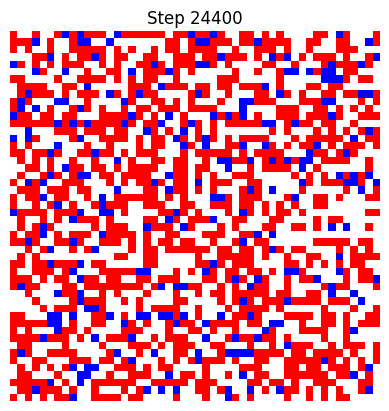

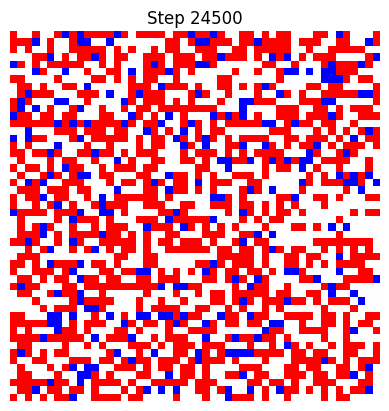

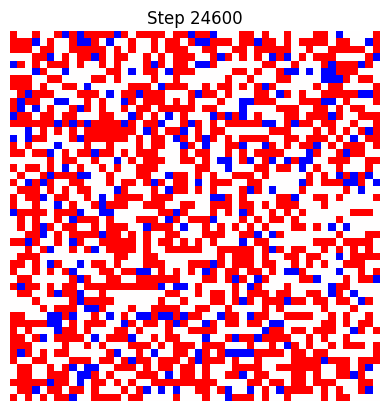

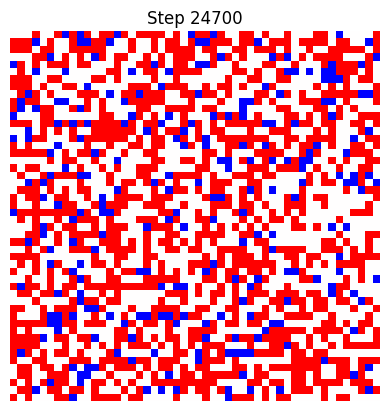

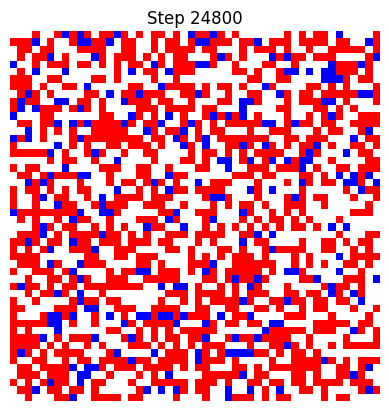

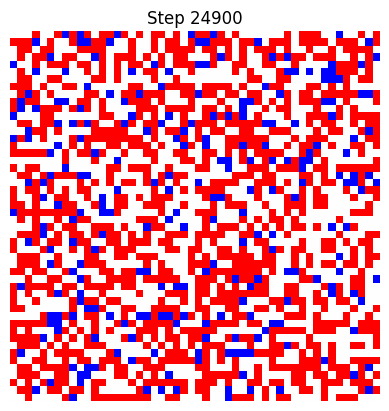

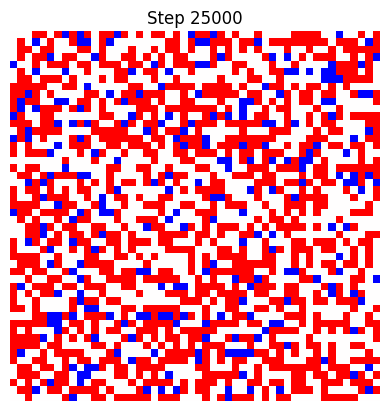

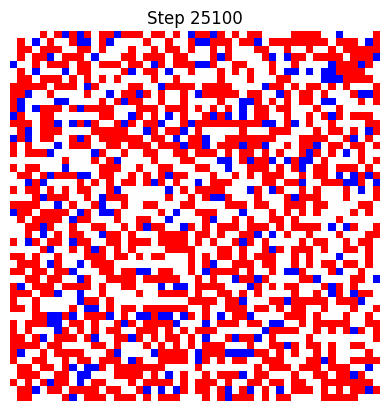

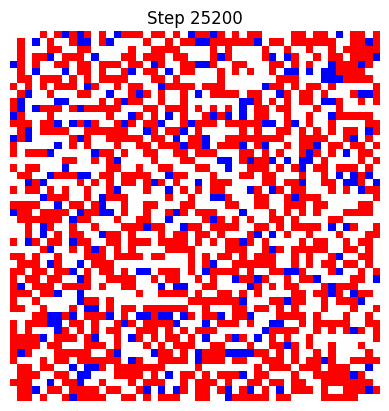

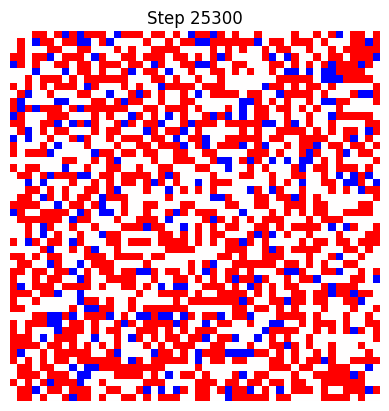

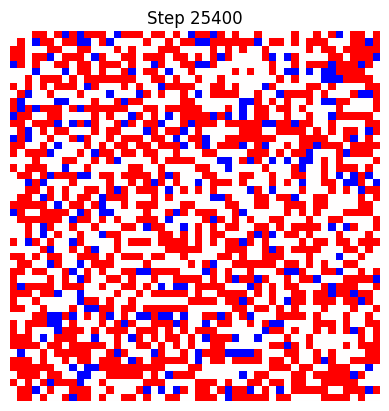

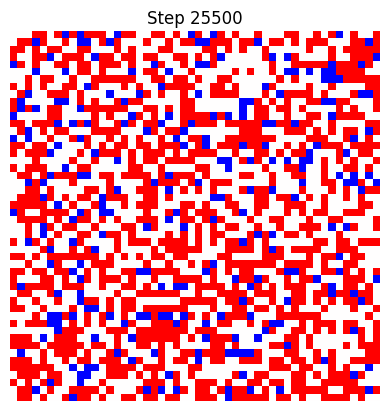

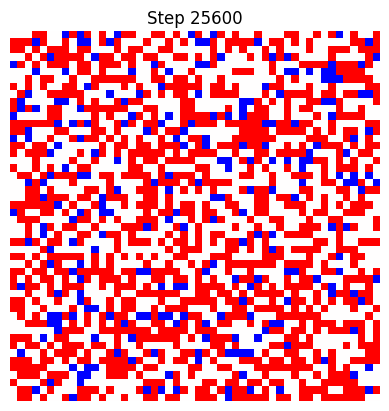

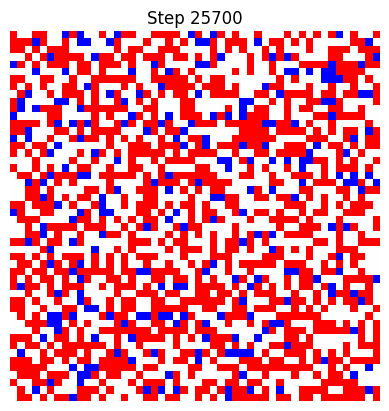

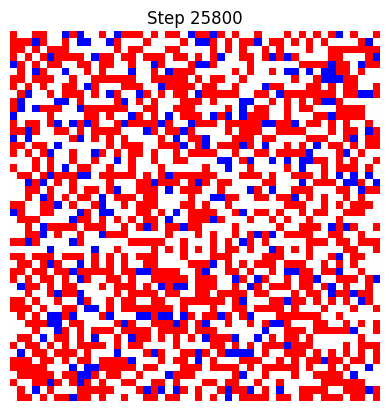

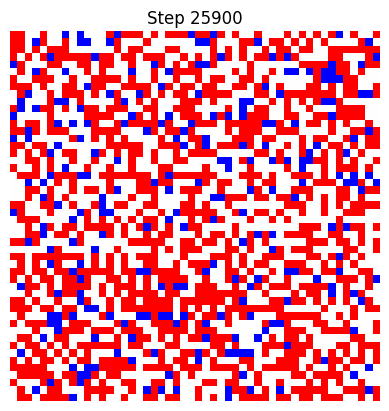

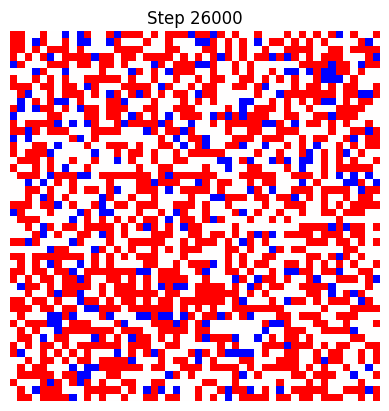

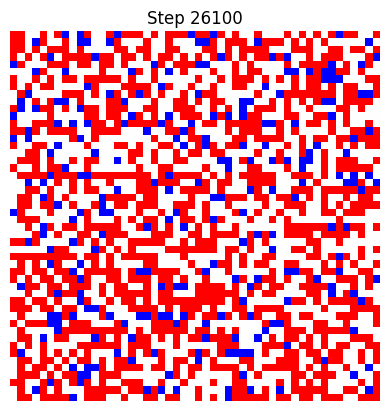

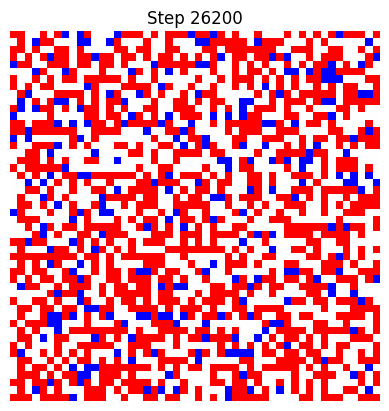

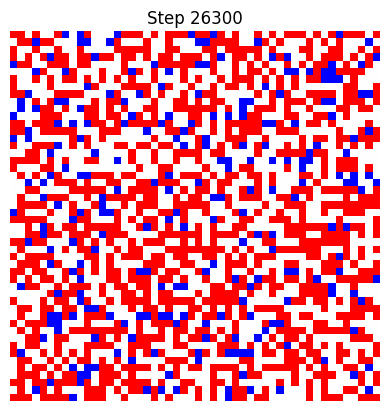

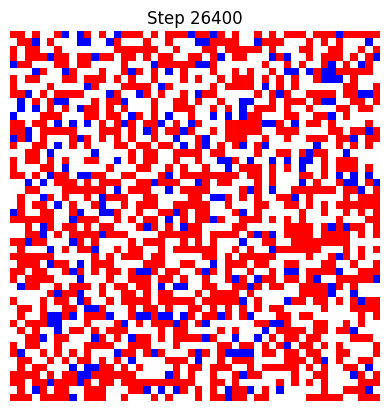

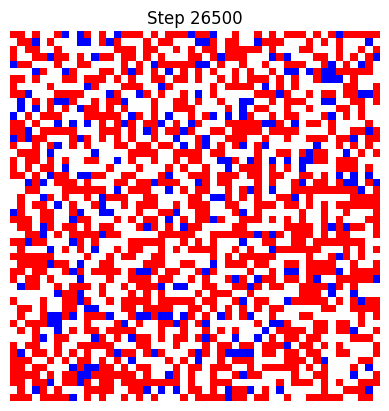

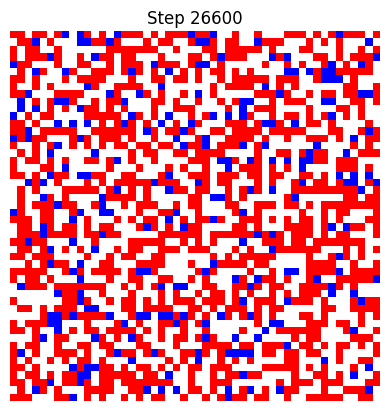

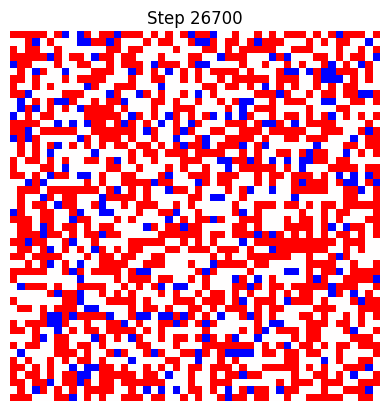

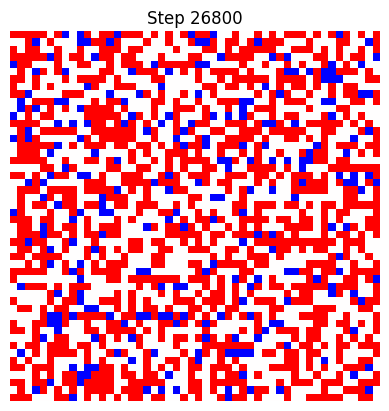

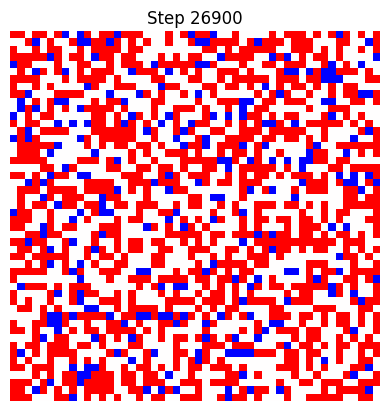

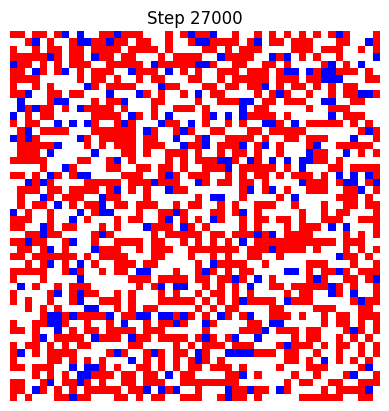

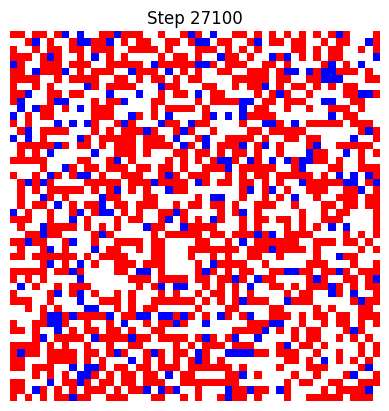

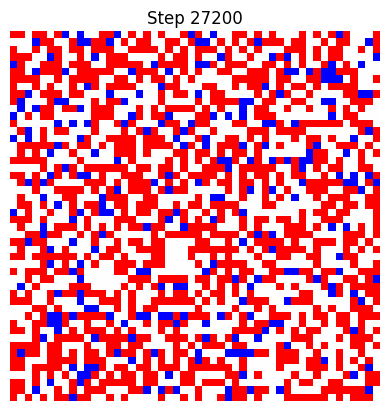

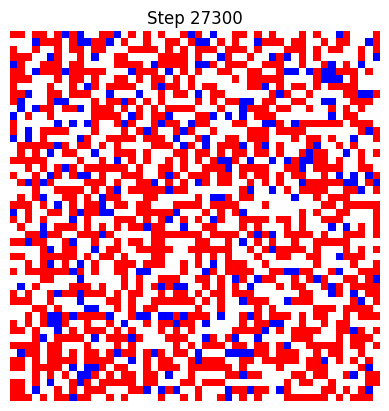

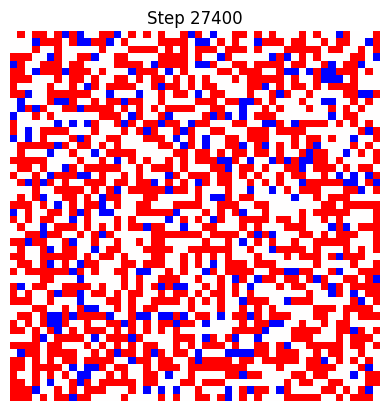

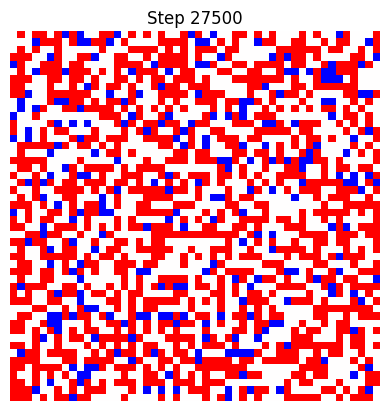

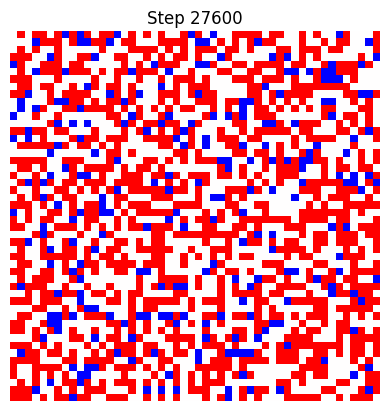

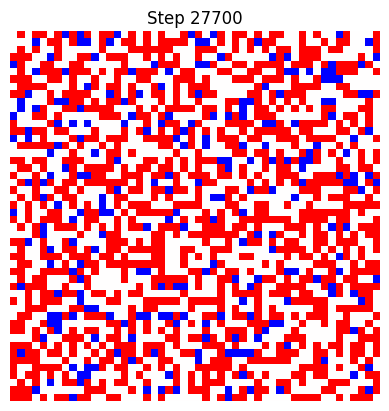

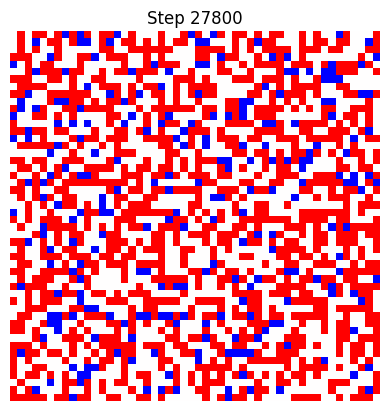

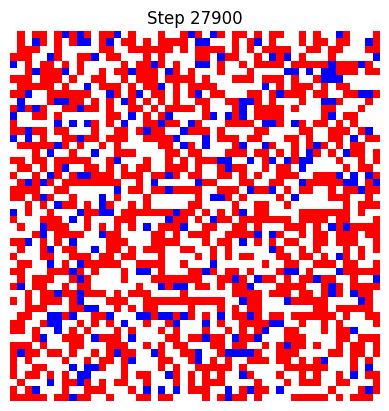

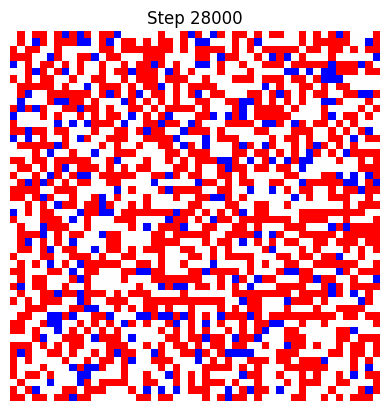

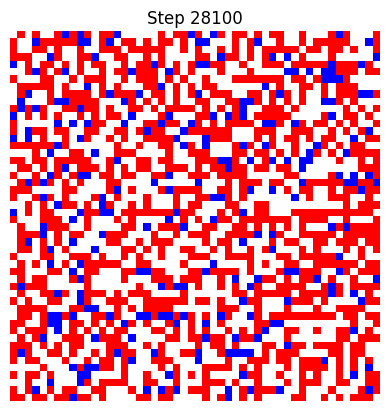

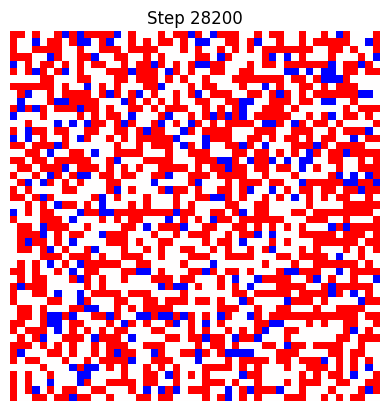

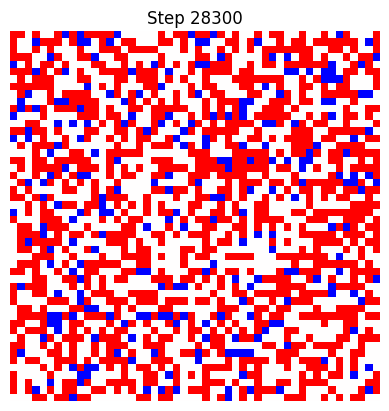

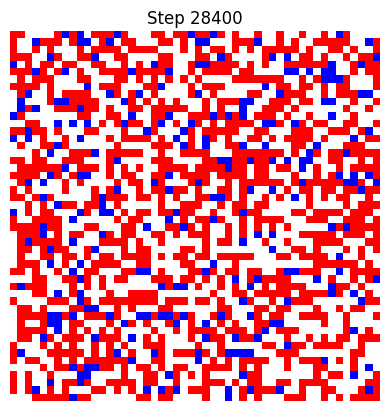

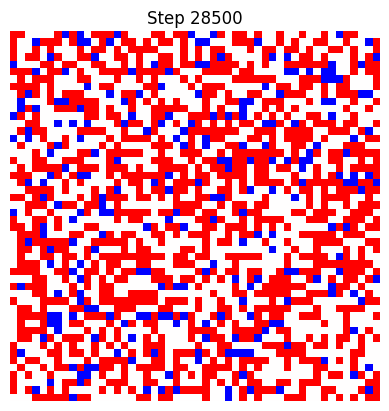

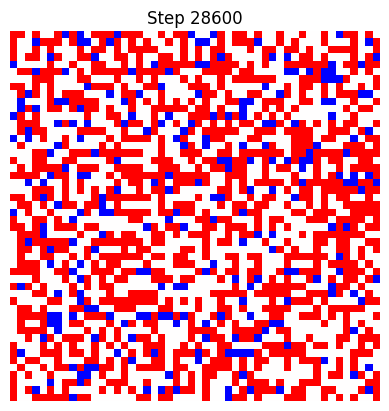

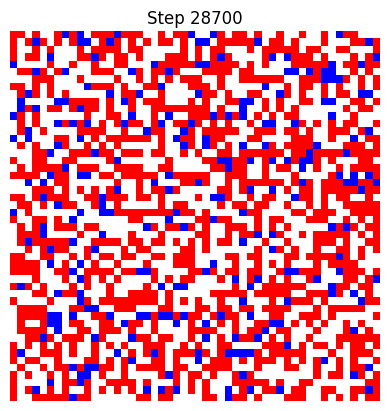

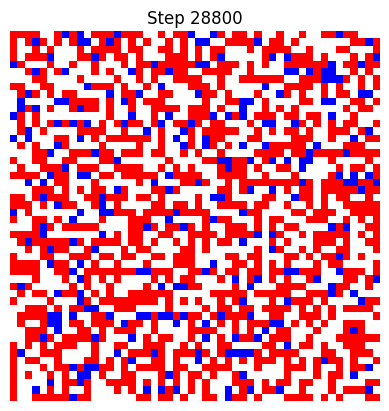

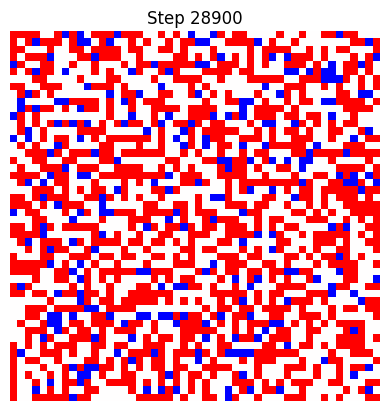

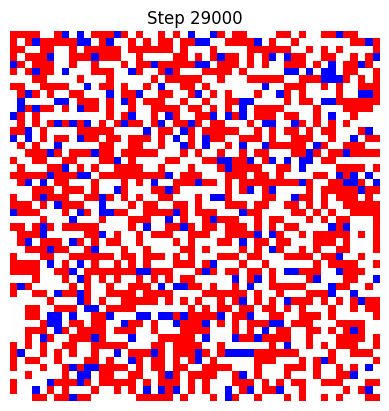

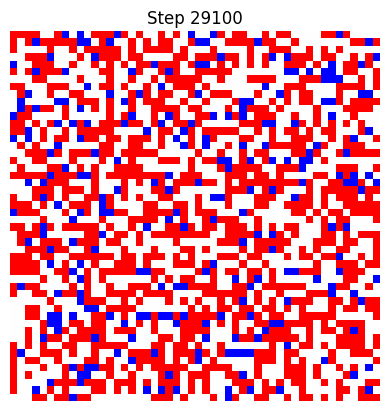

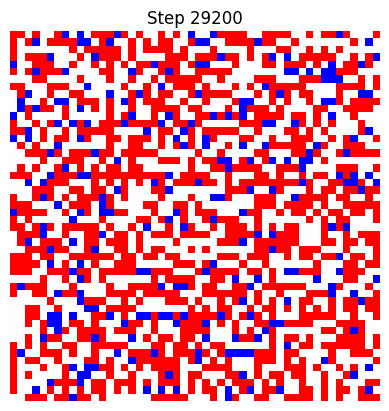

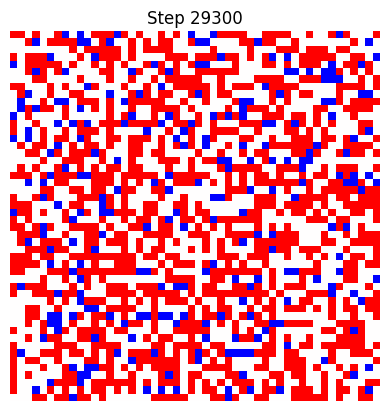

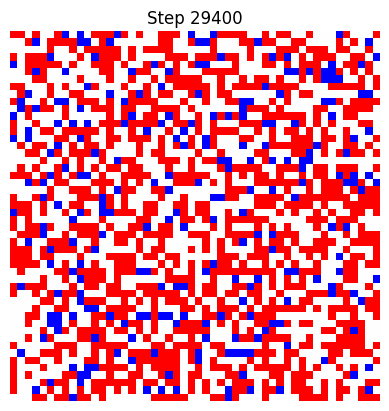

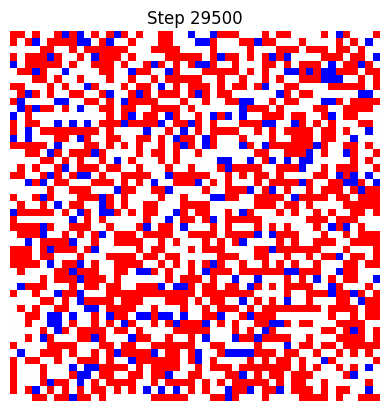

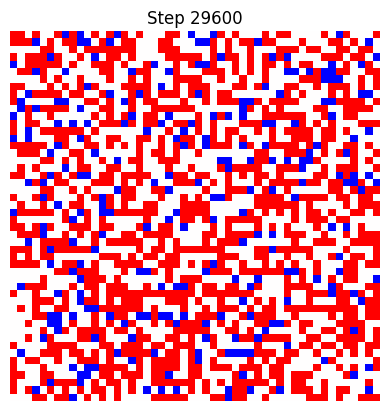

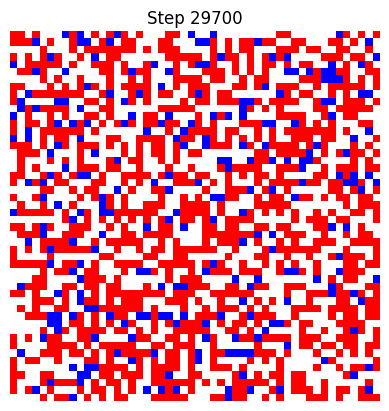

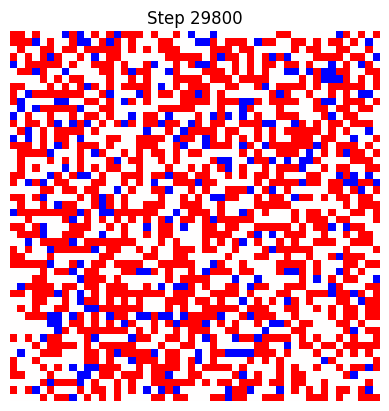

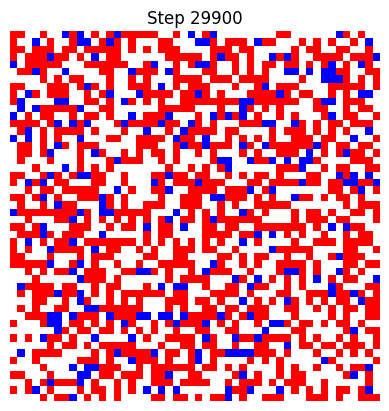

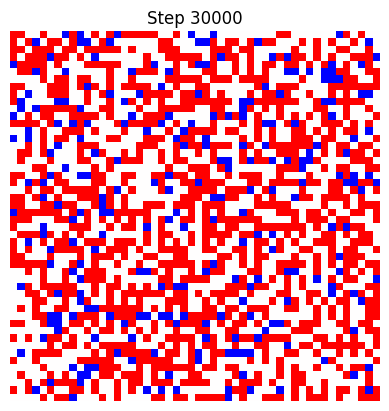

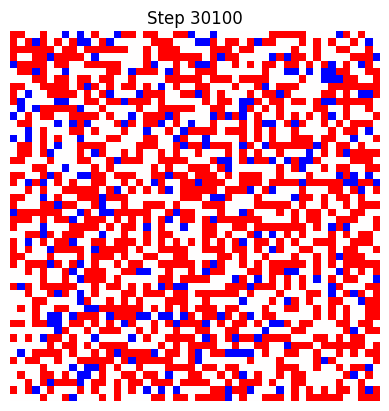

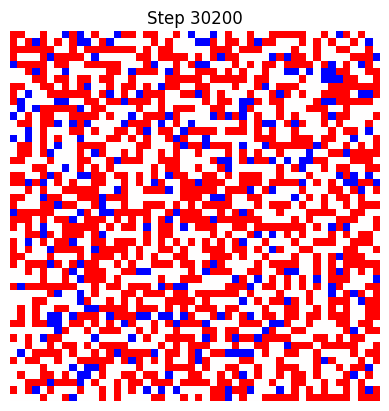

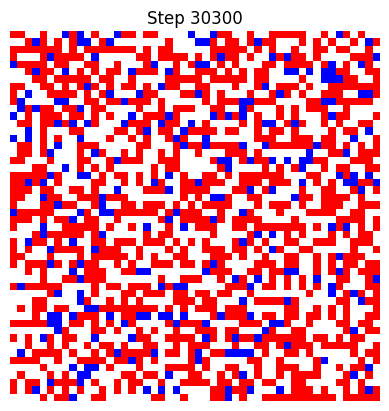

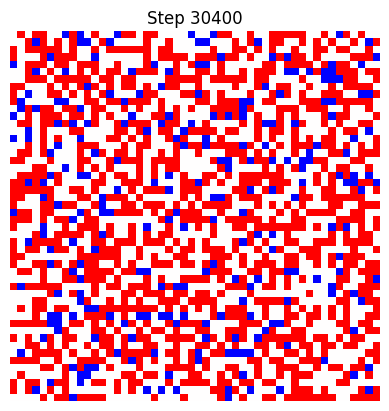

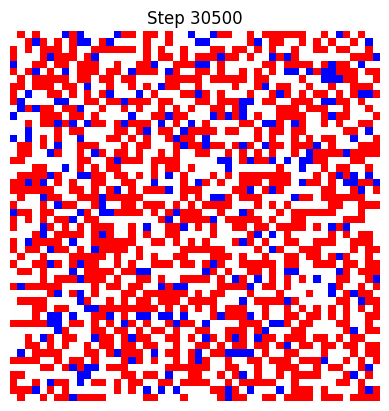

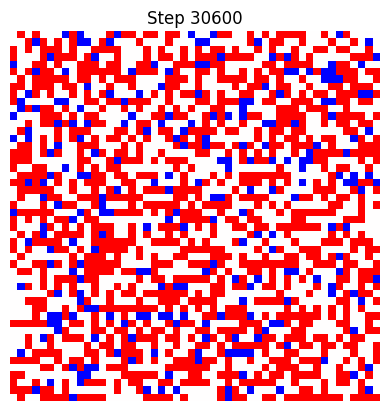

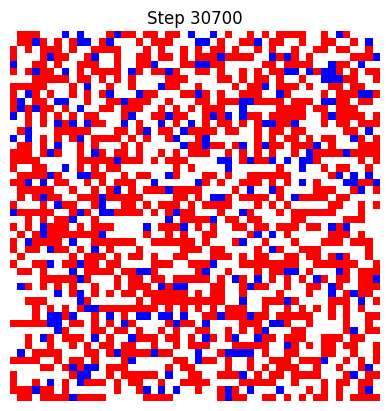

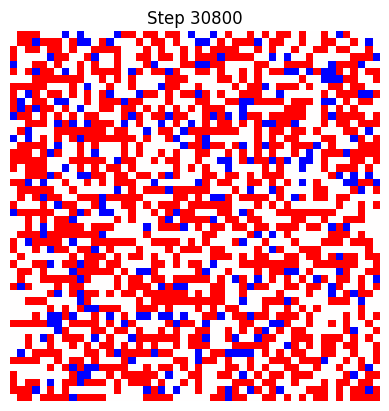

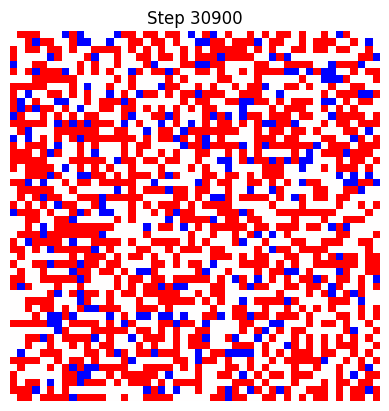

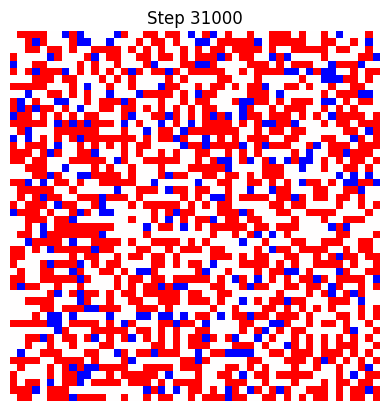

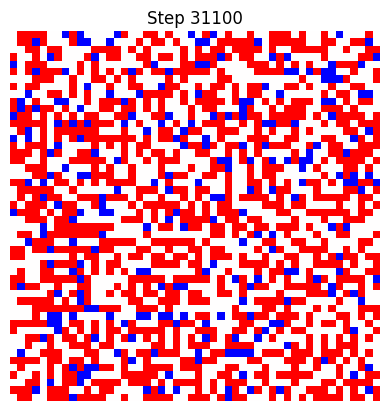

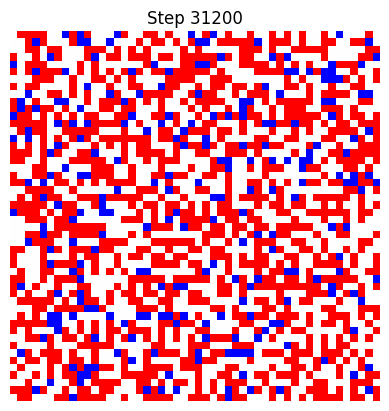

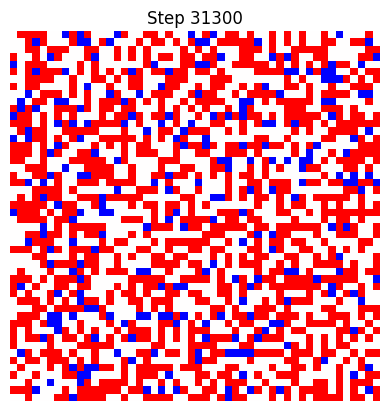

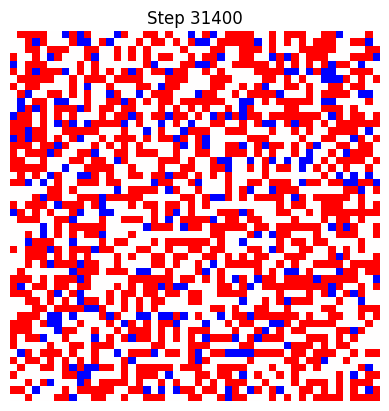

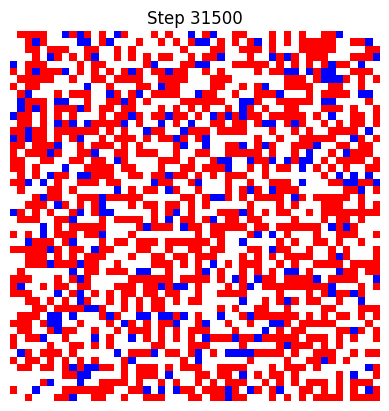

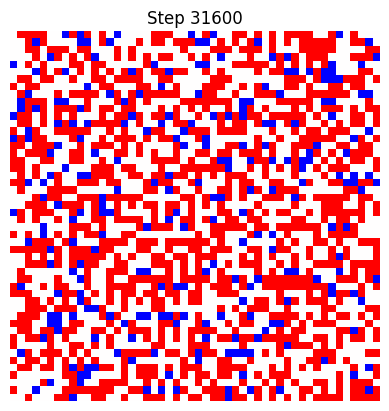

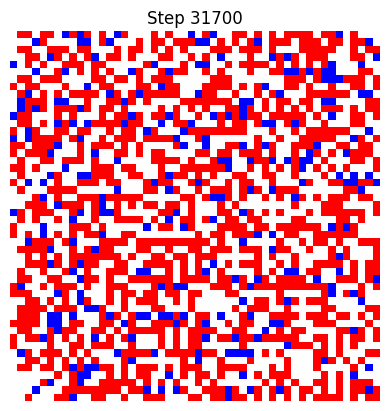

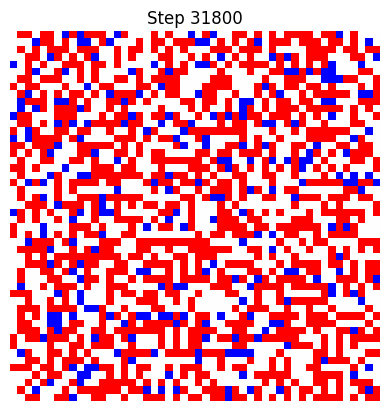

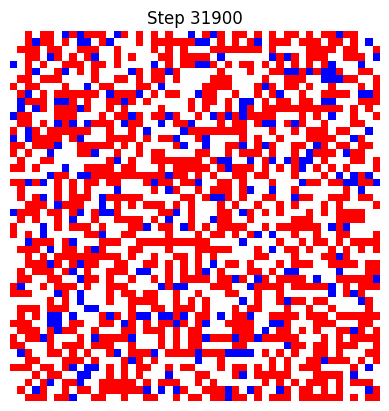

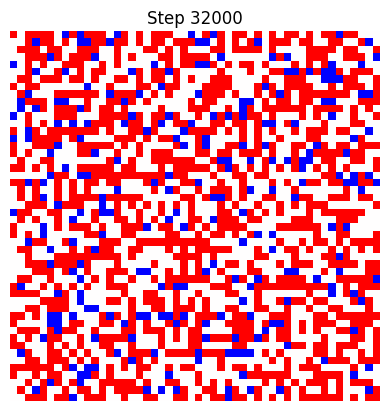

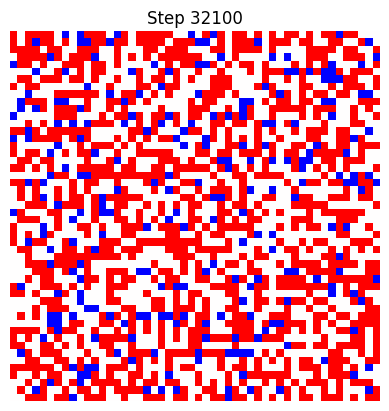

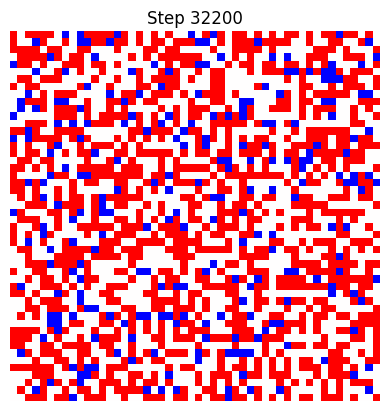

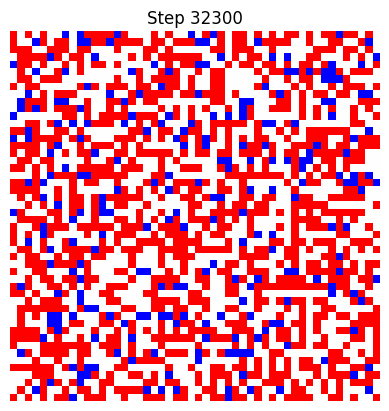

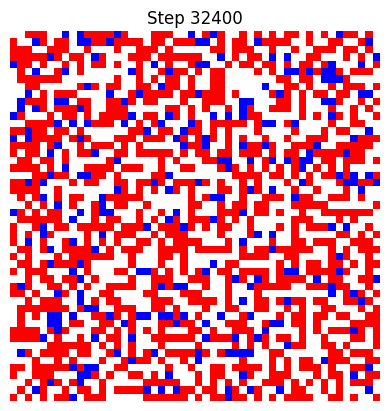

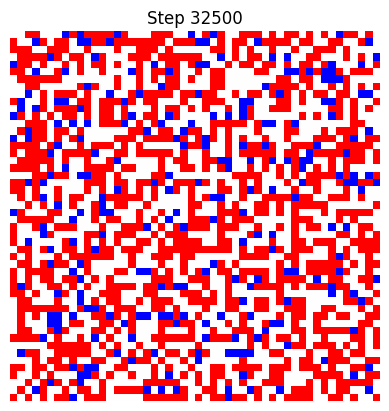

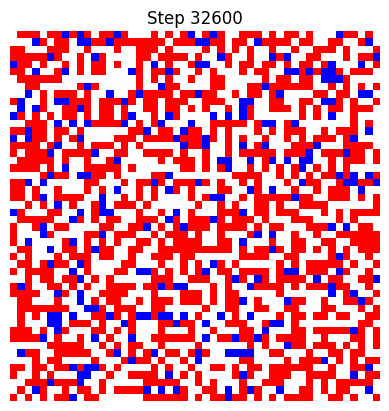

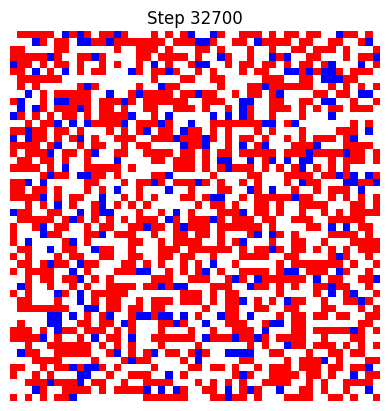

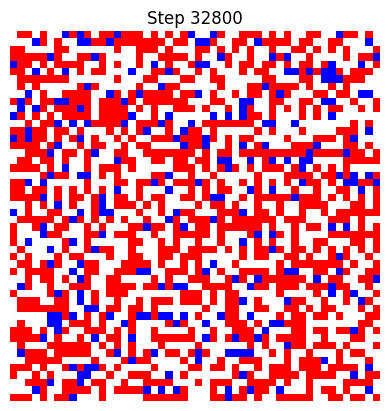

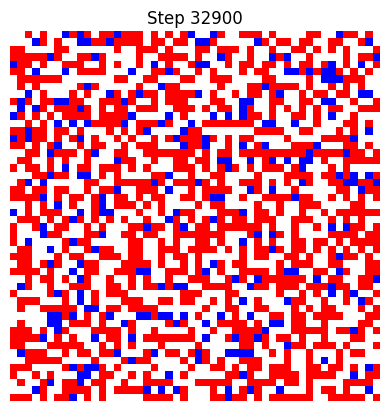

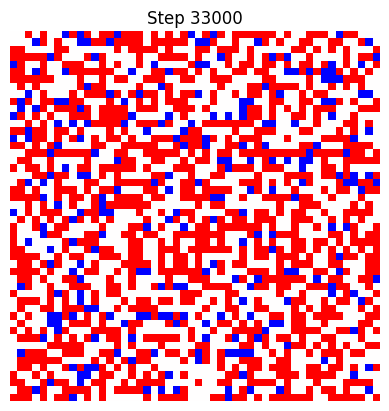

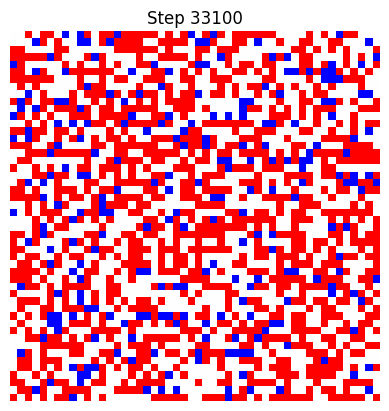

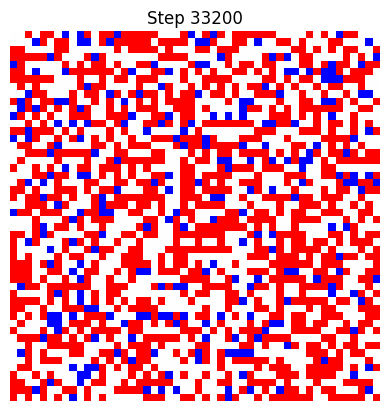

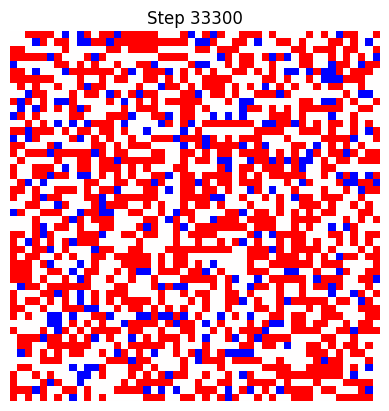

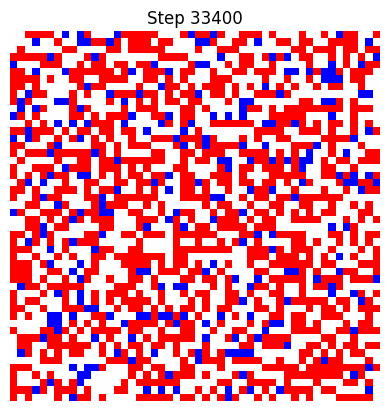

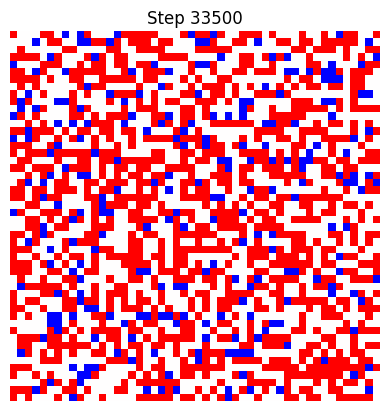

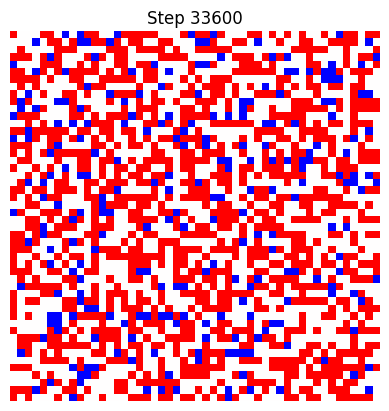

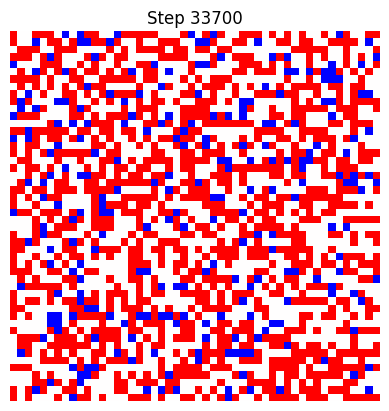

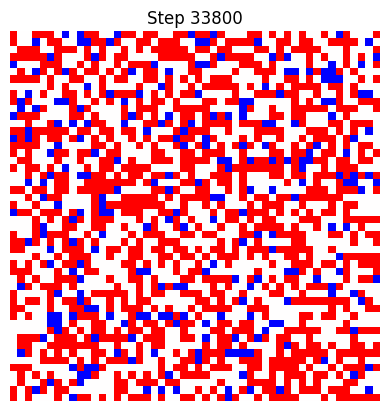

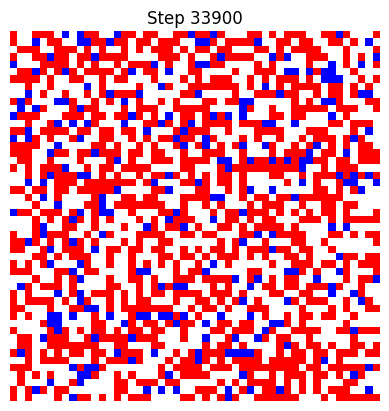

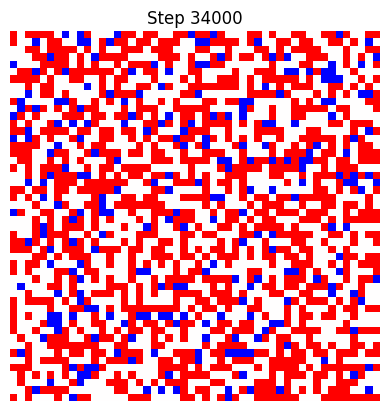

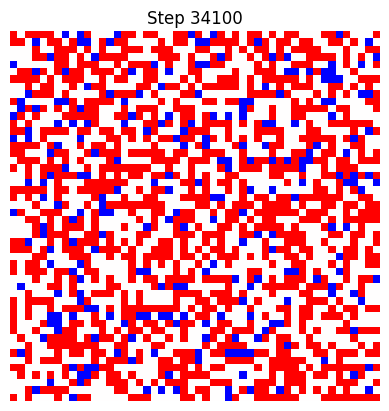

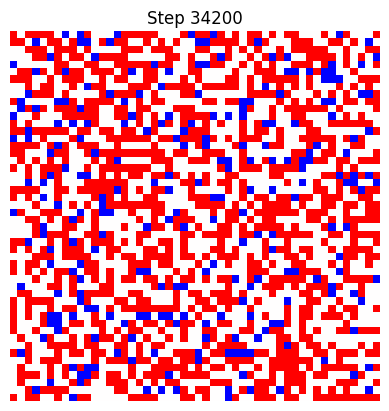

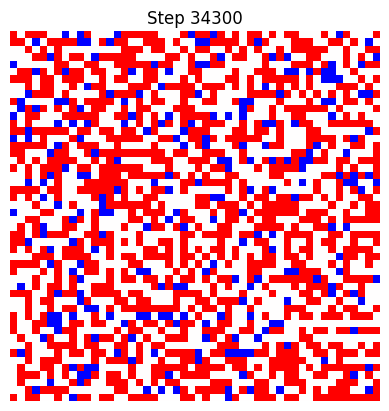

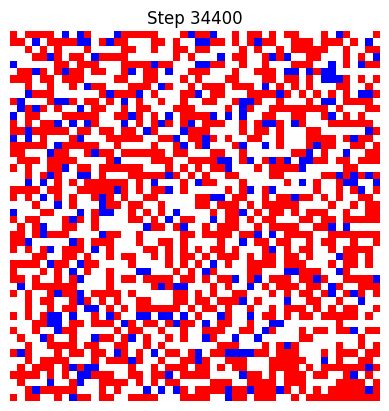

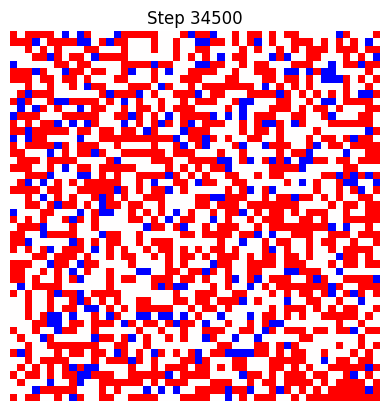

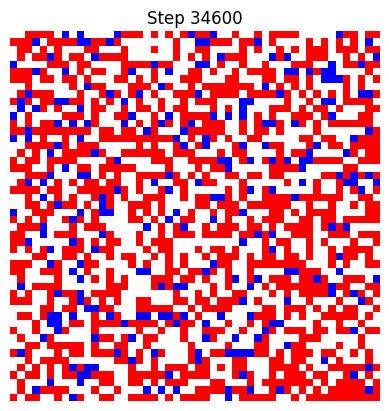

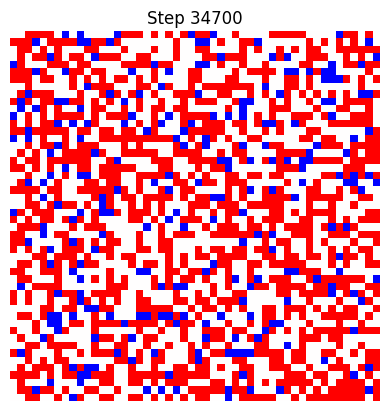

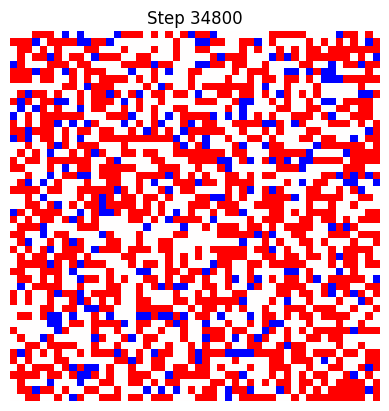

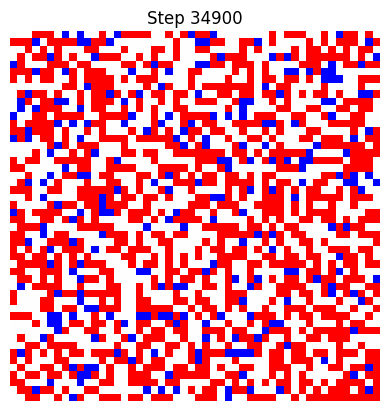

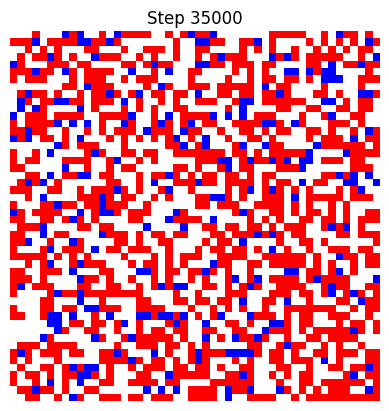

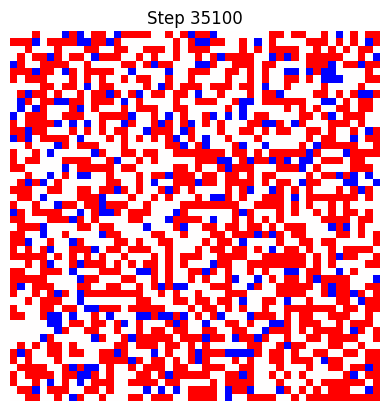

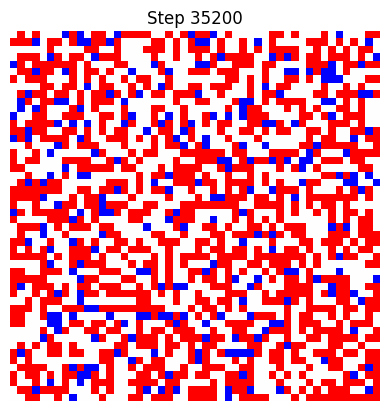

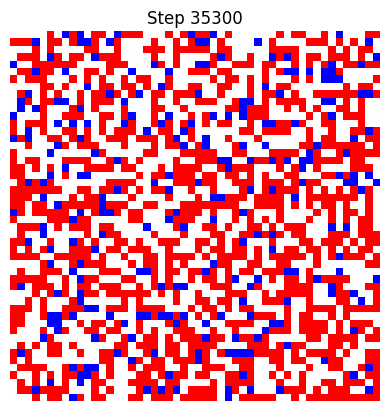

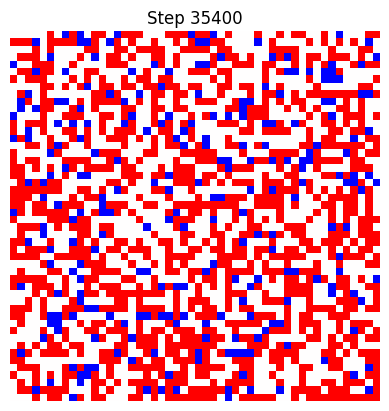

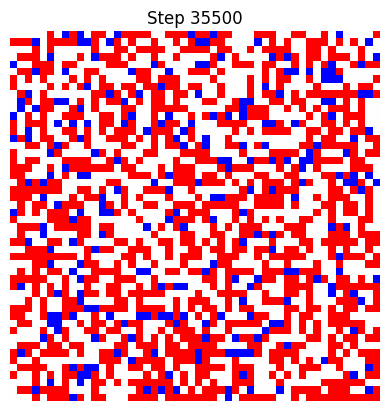

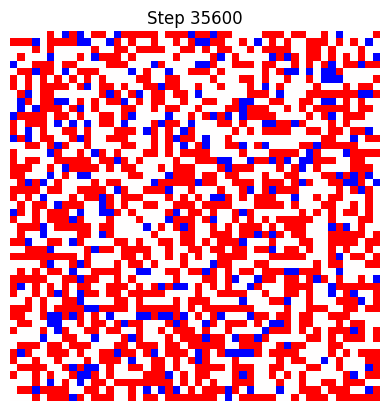

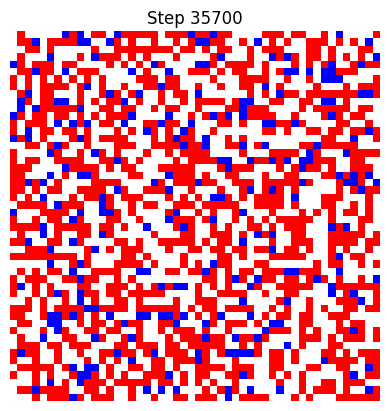

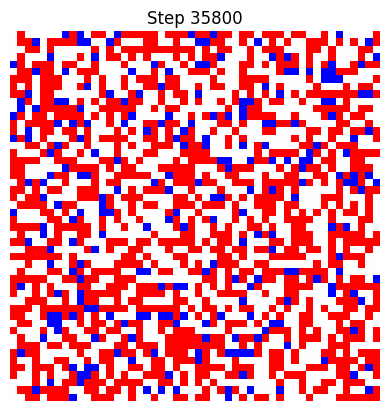

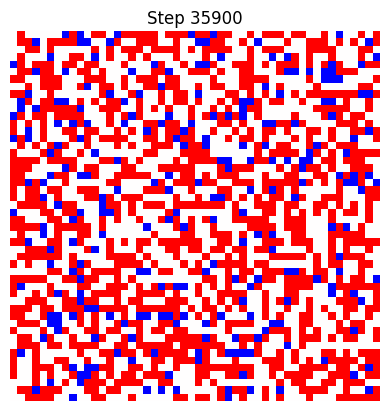

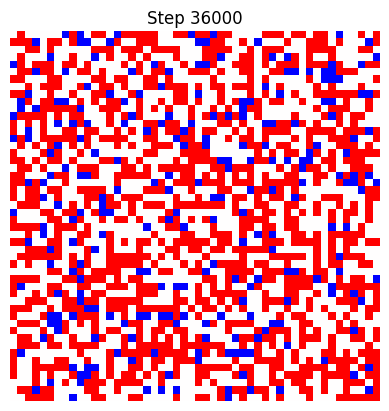

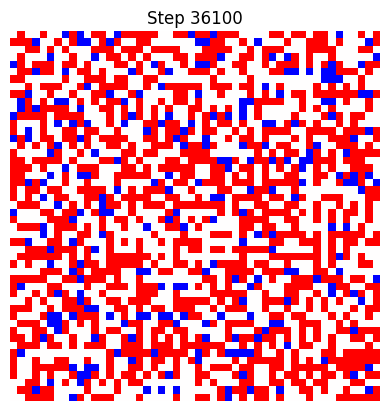

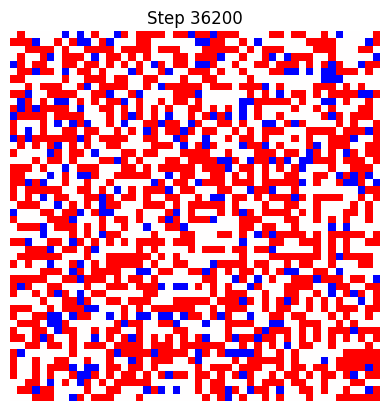

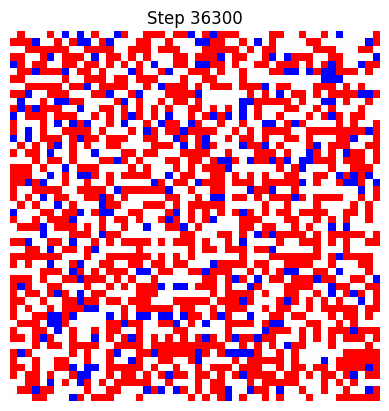

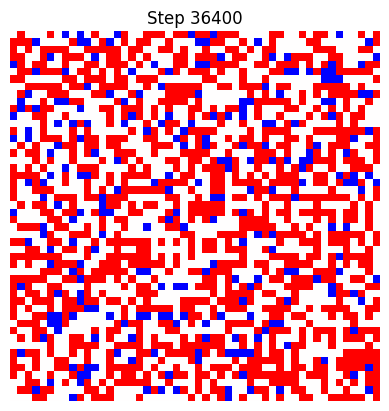

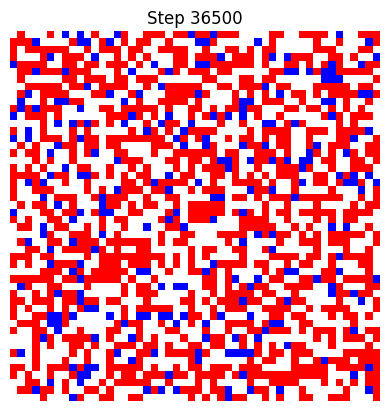

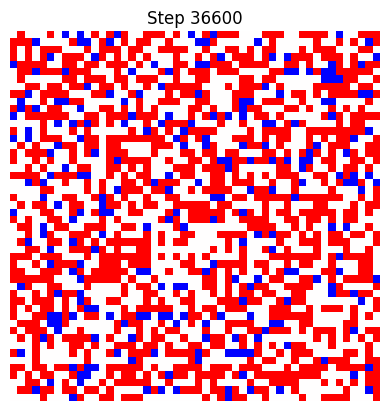

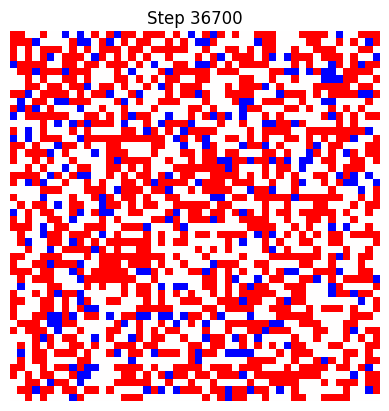

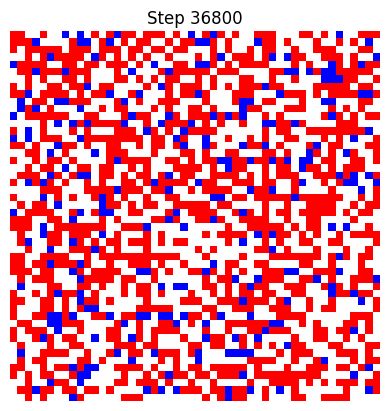

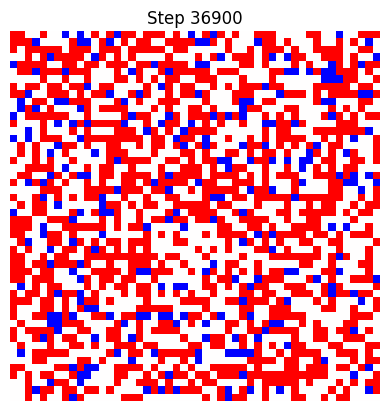

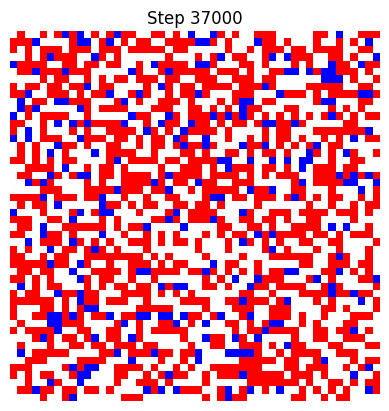

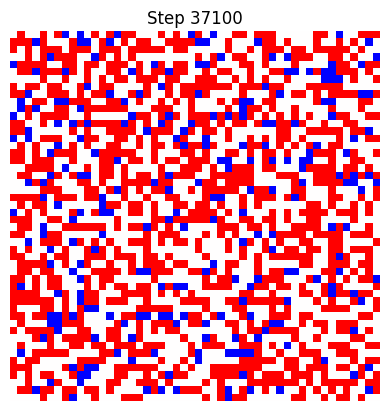

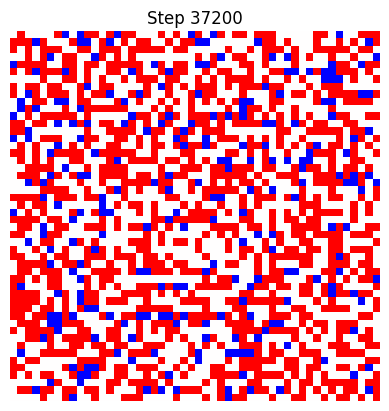

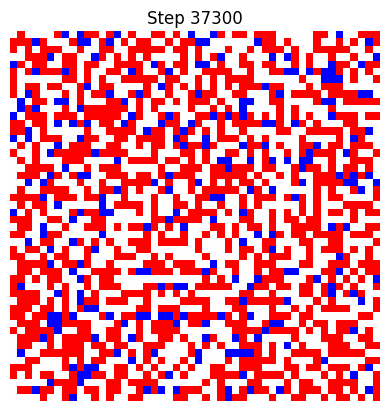

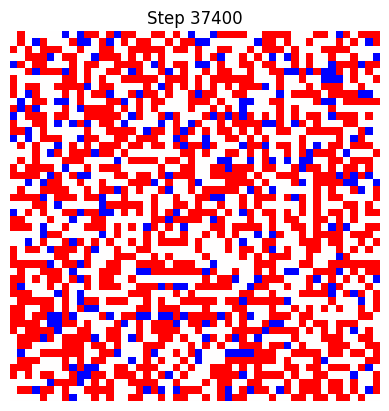

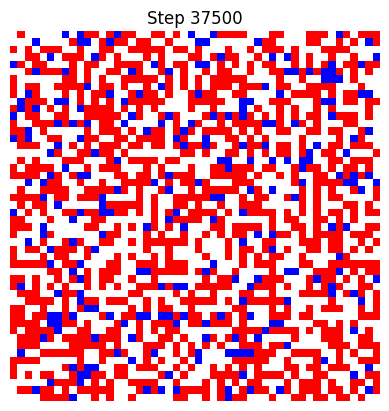

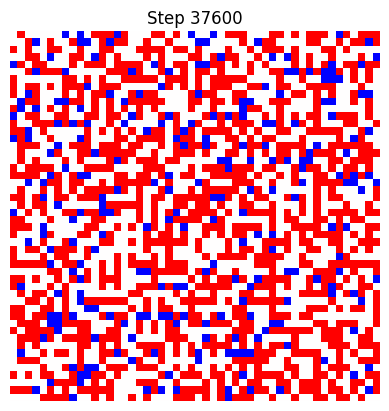

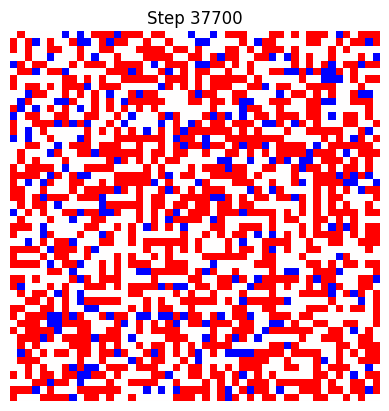

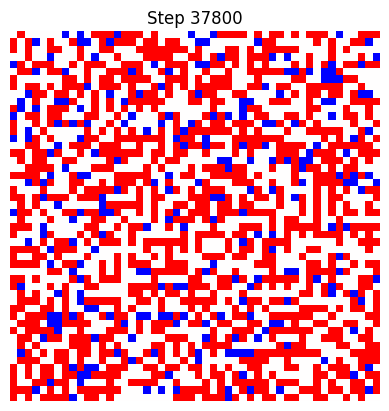

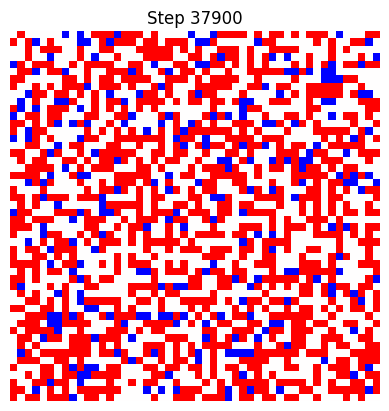

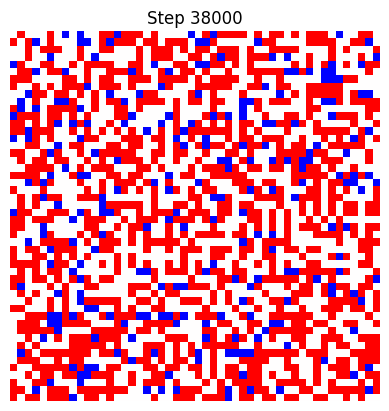

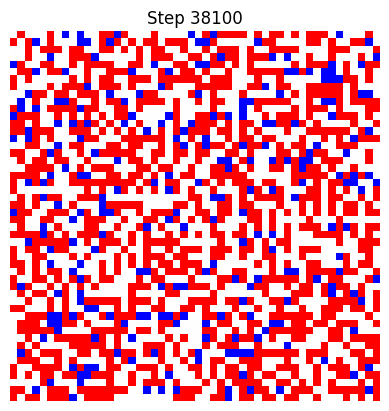

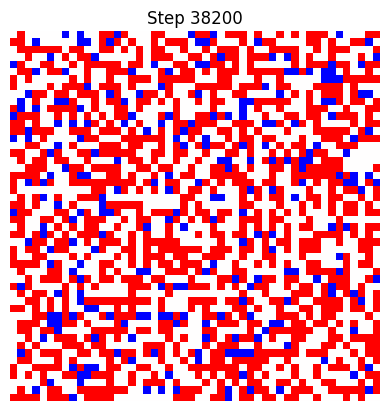

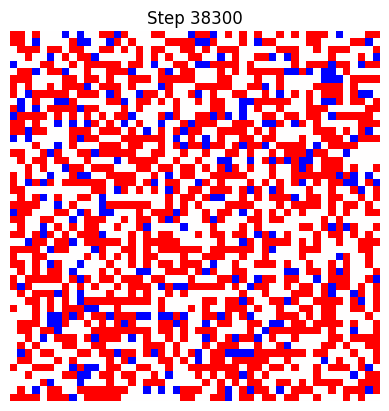

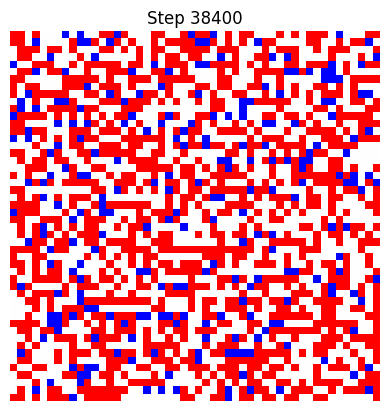

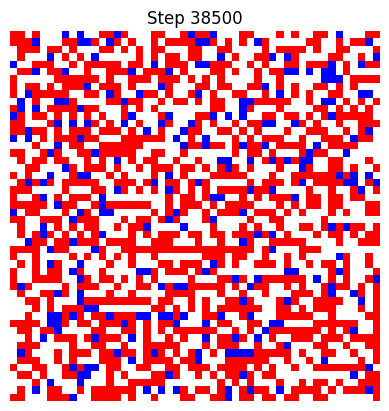

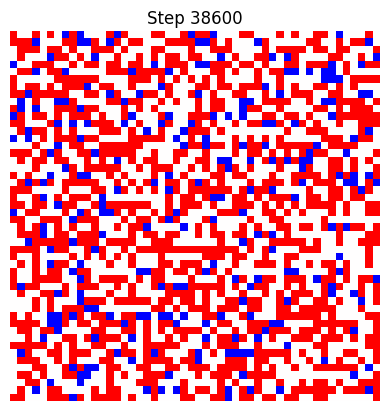

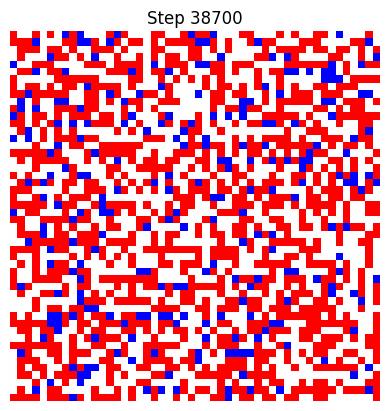

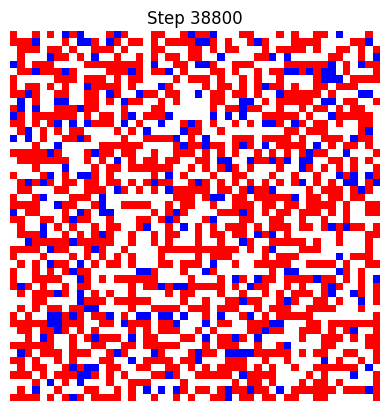

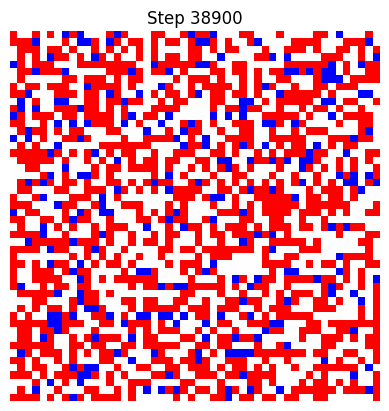

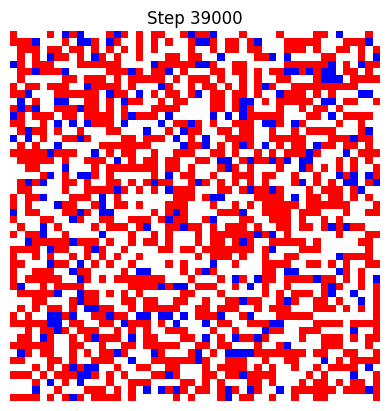

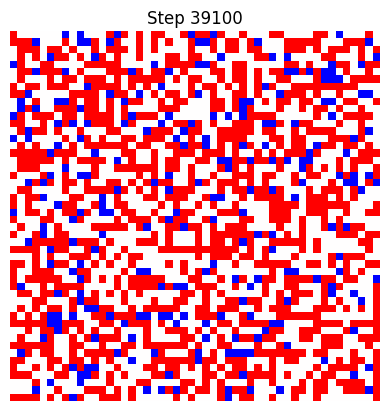

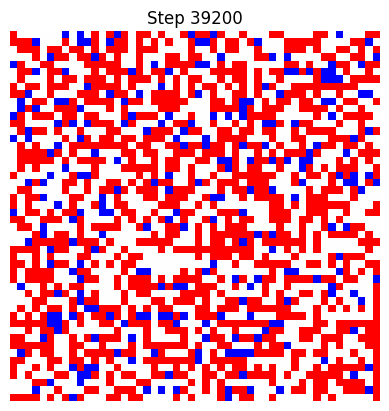

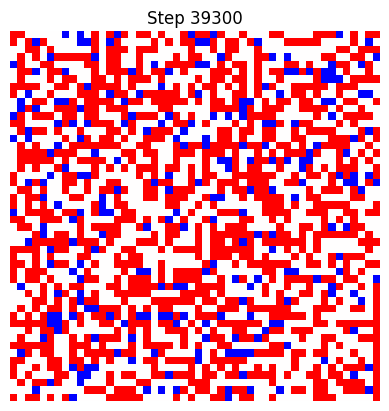

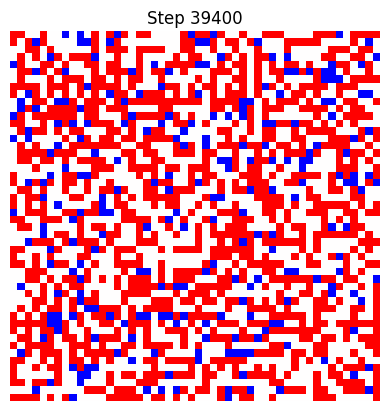

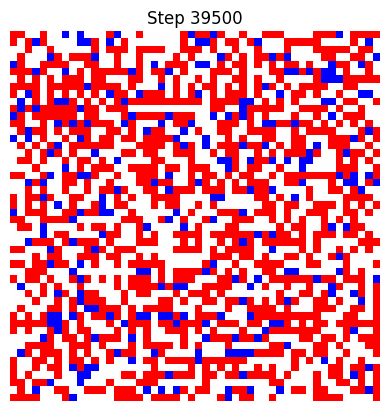

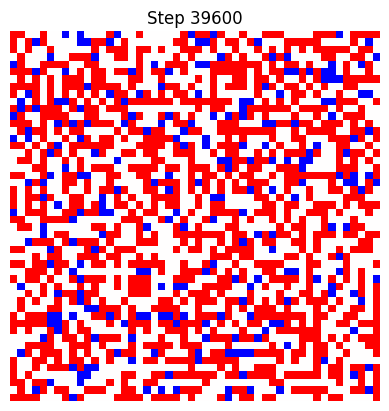

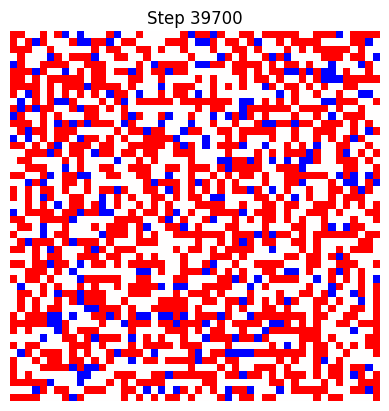

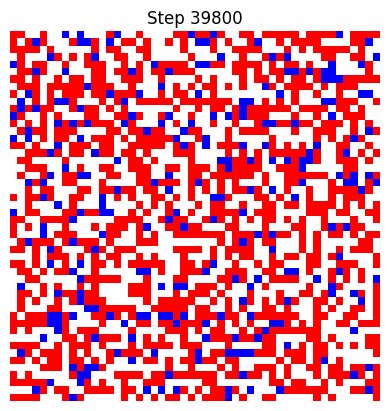

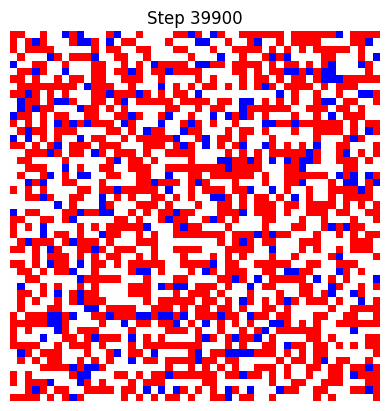

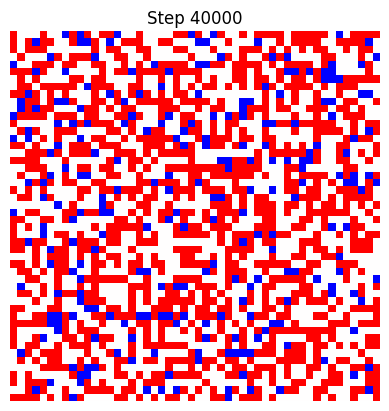

Несчастливые клетки: [(0, 0), (0, 2), (0, 3), (0, 6), (0, 8), (0, 10), (0, 11), (0, 13), (0, 16), (0, 18), (0, 19), (0, 20), (0, 23), (0, 25), (0, 26), (0, 28), (0, 29), (0, 30), (0, 31), (0, 33), (0, 35), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (1, 1), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 11), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 45), (1, 46), (1, 47), (1, 49), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 10), (2, 12), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29), (2, 30), (2, 32), (2, 34), (2, 35), (2, 37), (2, 38), (2, 39), (2, 40), (2, 41), (2, 42), (2, 43), (2, 44), (2, 45), (2, 47), (2, 48), (3, 2), (3, 3), (3, 7), (3, 8), (3, 9), (3, 10), (3, 12), (3,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Параметры модели
n = 50
blue_ratio = 0.45
red_ratio = 0.45
empty_ratio = 0.1
steps = 40000

# Инициализация сетки
def initialize_grid(n, blue_ratio, red_ratio, empty_ratio):
    total_cells = n * n
    num_blue = int(total_cells * blue_ratio)
    num_red = int(total_cells * red_ratio)
    num_empty = total_cells - num_blue - num_red
    grid = [0] * num_empty + [1] * num_blue + [2] * num_red
    np.random.shuffle(grid)
    return np.array(grid).reshape(n, n)

# Проверка "счастливости" клетки (ровно два соседа того же цвета)
def is_happy(grid, x, y):
    color = grid[x, y]
    if color == 0:
        return True

    # Получаем соседей клетки
    neighbors = grid[max(0, x-1):min(n, x+2), max(0, y-1):min(n, y+2)]
    same_color_neighbors = np.sum(neighbors == color) - 1

    return same_color_neighbors == 2

# Перемещение одной "несчастной" клетки
def move_unhappy_cell(grid):
    empty_cells = set(zip(*np.where(grid == 0)))
    unhappy_cells = [(x, y) for x in range(n) for y in range(n) if not is_happy(grid, x, y) and grid[x, y] != 0]

    if not unhappy_cells:
        return grid, False

    cell_to_move = random.choice(unhappy_cells)
    x, y = cell_to_move

    # Нахождение всех возможных перемещений в пределах сетки, избегая пустых клеток
    possible_moves = [(i, j) for i in range(n) for j in range(n) if grid[i, j] == 0 or grid[i, j] != grid[x, y]]
    possible_moves = [move for move in possible_moves if move not in empty_cells]

    if not possible_moves:
        return grid, False

    # Случайный выбор новой позиции для несчастной клетки
    new_position = random.choice(possible_moves)

    # Перемещение клетки в новое положение
    grid[new_position], grid[x, y] = grid[x, y], grid[new_position]
    return grid, True

# Отображение сетки
def plot_grid(grid, step):
    plt.imshow(grid, cmap='bwr', vmin=0, vmax=2)
    plt.title(f'Step {step}')
    plt.axis('off')
    plt.show()

# Моделирование
grid = initialize_grid(n, blue_ratio, red_ratio, empty_ratio)
step = 0

while step < steps:
    grid, moved = move_unhappy_cell(grid)
    step += 1

    if step % 100 == 0:
        plot_grid(grid, step)

    # Проверка, все ли клетки счастливы
    all_happy = all(is_happy(grid, x, y) for x in range(n) for y in range(n) if grid[x, y] != 0)
    if all_happy:
        print(f"Моделирование стабилизровалось и все ячейки счастливы на этапе: {step}")
        plot_grid(grid, step)
        break

# Дополнительная проверка: вывод координат несчастных клеток
unhappy_cells = [(x, y) for x in range(n) for y in range(n) if not is_happy(grid, x, y) and grid[x, y] != 0]
if unhappy_cells:
    print("Несчастливые клетки:", unhappy_cells)
else:
    print("Все клетки счастливы")
